# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [0]:
# Import warnings
import warnings 
warnings.filterwarnings("ignore")


In [0]:
# Import the libraries you will be using for analysis

# Install the libraries you will be using for analysis
# %pip install pandas==2.2.2
# %pip install numpy==1.26.4
# %pip install matplotlib==3.10.0
# %pip install seaborn==0.13.2

# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [0]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.20.1
pandas version: 1.2.4
matplotlib version: 3.4.2
seaborn version: 0.11.1

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [0]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

df1= pd.read_parquet('/dbfs/FileStore/FDL_Krypton/2023_1.parquet')
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 # Column Dtype 
--- ------ ----- 
 0 VendorID int64 
 1 tpep_pickup_datetime datetime64[ns]
 2 tpep_dropoff_datetime datetime64[ns]
 3 passenger_count float64 
 4 trip_distance float64 
 5 RatecodeID float64 
 6 store_and_fwd_flag object 
 7 PULocationID int64 
 8 DOLocationID int64 
 9 payment_type int64 
 10 fare_amount float64 
 11 extra float64 
 12 mta_tax float64 
 13 tip_amount float64 
 14 tolls_amount float64 
 15 improvement_surcharge float64 
 16 total_amount float64 
 17 congestion_surcharge float64 
 18 airport_fee float64 
dtypes: datetime64[ns](2), float64(12), int64(4), object(1)
memory usage: 464.1+ MB
Out[4]: (3041714, 19)

In [0]:
df1.head(5)
#analysing the data from first file

Out[5]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 store_and_fwd_flag 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 mta_tax 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 airport_fee 
 
 
 
 
 0 
 2 
 2023-01-01 00:32:10 
 2023-01-01 00:40:36 
 1.0 
 0.97 
 1.0 
 N 
 161 
 141 
 2 
 9.3 
 1.00 
 0.5 
 0.00 
 0.0 
 1.0 
 14.30 
 2.5 
 0.00 
 
 
 1 
 2 
 2023-01-01 00:55:08 
 2023-01-01 01:01:27 
 1.0 
 1.10 
 1.0 
 N 
 43 
 237 
 1 
 7.9 
 1.00 
 0.5 
 4.00 
 0.0 
 1.0 
 16.90 
 2.5 
 0.00 
 
 
 2 
 2 
 2023-01-01 00:25:04 
 2023-01-01 00:37:49 
 1.0 
 2.51 
 1.0 
 N 
 48 
 238 
 1 
 14.9 
 1.00 
 0.5 
 15.00 
 0.0 
 1.0 
 34.90 
 2.5 
 0.00 
 
 
 3 
 1 
 2023-01-01 00:03:48 
 2023-01-01 00:13:25 
 0.0 
 1.90 
 1.0 
 N 
 138 
 7 
 1 
 12.1 
 7.25 
 0.5 
 0.00 
 0.0 
 1.0 
 20.85 
 0.0 
 1.25 
 
 
 4 
 2 
 2023-01-01 00:10:29 
 2023-01-01 00:21:19 
 1.0 
 1.43 
 1.0 
 N 
 107 
 79 
 1 
 11.4 
 1.00 
 0.5 
 3.28 
 0.0 
 1.0 
 19.68 
 2.5 
 0.00

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [0]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import os
import pandas as pd

# Set the directory containing the data files
os.chdir('/dbfs/FileStore/FDL_Krypton')

# Create a list of all 12 files starting with "2023_"
file_list = [file for file in os.listdir() if file.startswith("2023_")]

# We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
# After completing iteration through each date, we will append this data to the final dataframe.

# Initialize an empty DataFrame to store combined sampled data
combined_sampled_data = pd.DataFrame()

# Iterate through the list of files
for file_name in file_list:
    try:
        # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df = pd.read_parquet(file_path)

        # Convert 'tpep_pickup_datetime' to datetime type
        df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

        # Initialize an empty DataFrame to store sampled data for the current file
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        # Loop through each unique date in the DataFrame
        for date in df['tpep_pickup_datetime'].dt.date.unique():
            # Filter the DataFrame for the specific date
            daily_data = df[df['tpep_pickup_datetime'].dt.date == date]

            # Iterate through each hour (0 to 23)
            for hour in range(24):
                # Filter for the specific hour
                hour_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hour_data  (hourly data randomly)
                if not hour_data.empty:  # Ensure there is data for the hour
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    # Append the sample to the sampled_data DataFrame
                    sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        combined_sampled_data = pd.concat([combined_sampled_data, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Display the combined sampled data
print(combined_sampled_data.head())

VendorID tpep_pickup_datetime ... airport_fee Airport_fee
0 2 2023-01-01 00:07:18 ... 1.25 NaN
1 2 2023-01-01 00:16:41 ... 0.00 NaN
2 2 2023-01-01 00:14:03 ... 0.00 NaN
3 2 2023-01-01 00:24:30 ... 0.00 NaN
4 2 2023-01-01 00:43:00 ... NaN NaN

[5 rows x 20 columns]

In [0]:
combined_sampled_data.shape

Out[9]: (1896400, 20)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [0]:
# Store the df in csv/parquet
# df.to_parquet('')

# Specify the output file path
output_file_path = '/dbfs/FileStore/FDL_Krypton/combined_sampled_data.parquet'

# Write the combined sampled data to a Parquet file
combined_sampled_data.to_parquet(output_file_path, index=False)

print(f"Combined sampled data has been written to {output_file_path}")

Combined sampled data has been written to /dbfs/FileStore/FDL_Krypton/combined_sampled_data.parquet

In [0]:
# As the overall combined data is coming to 18Lac plus, I am doing the sampling one more time to extract only 15% of the combined data for each date in hourly basis randomly.This will lessen my dataset size.

import pandas as pd

# Assuming combined_sampled_data is already available
# combined_sampled_data = pd.read_parquet('/dbfs/FileStore/FDL_Krypton/combined_sampled_data.parquet')

# Initialize an empty DataFrame to store the final sampled data
final_sampled_data = pd.DataFrame()

# Loop through each unique date in the combined sampled data
for date in combined_sampled_data['tpep_pickup_datetime'].dt.date.unique():
    # Filter the DataFrame for the specific date
    daily_data = combined_sampled_data[combined_sampled_data['tpep_pickup_datetime'].dt.date == date]

    # Iterate through each hour (0 to 23)
    for hour in range(24):
        # Filter for the specific hour
        hour_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]

        # Sample 20% of the hour_data
        if not hour_data.empty:  # Ensure there is data for the hour
            sample = hour_data.sample(frac=0.15, random_state=42)
            # Append the sample to the final_sampled_data DataFrame
            final_sampled_data = pd.concat([final_sampled_data, sample])

# Display the final sampled data
print(final_sampled_data.shape)

# Specify the output file path
output_file_path = '/dbfs/FileStore/FDL_Krypton/final_sampled_data.parquet'

# Write the combined sampled data to a Parquet file
final_sampled_data.to_parquet(output_file_path, index=False)

print(f"Final sampled data has been written to {output_file_path}")

(284495, 20)
Final sampled data has been written to /dbfs/FileStore/FDL_Krypton/final_sampled_data.parquet

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [0]:
# Load the new data file

df_taxi_data = pd.read_parquet('/dbfs/FileStore/FDL_Krypton/final_sampled_data.parquet')
df_taxi_data.info()
df_taxi_data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284495 entries, 0 to 284494
Data columns (total 20 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 VendorID 284495 non-null int64 
 1 tpep_pickup_datetime 284495 non-null datetime64[ns]
 2 tpep_dropoff_datetime 284495 non-null datetime64[ns]
 3 passenger_count 274720 non-null float64 
 4 trip_distance 284495 non-null float64 
 5 RatecodeID 274720 non-null float64 
 6 store_and_fwd_flag 274720 non-null object 
 7 PULocationID 284495 non-null int64 
 8 DOLocationID 284495 non-null int64 
 9 payment_type 284495 non-null int64 
 10 fare_amount 284495 non-null float64 
 11 extra 284495 non-null float64 
 12 mta_tax 284495 non-null float64 
 13 tip_amount 284495 non-null float64 
 14 tolls_amount 284495 non-null float64 
 15 improvement_surcharge 284495 non-null float64 
 16 total_amount 284495 non-null float64 
 17 congestion_surcharge 274720 non-null float64 
 18 airport_fee 22251 non-null float64 
 19 Airport_fee 252469 non-null float64 
dtypes: datetime64[ns](2), float64(13), int64(4), object(1)
memory usage: 43.4+ MB
Out[11]: (284495, 20)

In [0]:
# df.head()
df_taxi_data.head(5)

Out[12]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 store_and_fwd_flag 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 mta_tax 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 airport_fee 
 Airport_fee 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1.0 
 1.30 
 1.0 
 N 
 90 
 211 
 1 
 9.3 
 3.50 
 0.5 
 2.85 
 0.00 
 1.0 
 17.15 
 2.5 
 0.00 
 NaN 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1.0 
 5.35 
 1.0 
 N 
 236 
 244 
 1 
 23.3 
 1.00 
 0.5 
 5.66 
 0.00 
 1.0 
 33.96 
 2.5 
 0.00 
 NaN 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1.0 
 4.13 
 1.0 
 N 
 79 
 236 
 1 
 19.8 
 1.00 
 0.5 
 4.96 
 0.00 
 1.0 
 29.76 
 2.5 
 0.00 
 NaN 
 
 
 3 
 1 
 2023-01-01 00:18:33 
 2023-01-01 00:54:44 
 1.0 
 21.00 
 2.0 
 N 
 132 
 238 
 1 
 70.0 
 3.75 
 0.5 
 0.00 
 6.55 
 1.0 
 81.80 
 2.5 
 1.25 
 NaN 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2.0 
 0.90 
 1.0 
 N 
 148 
 114 
 1 
 7.9 
 3.50 
 0.5 
 1.00 
 0.00 
 1.0 
 13.90 
 2.5 
 0.00 
 NaN

In [0]:
# df.info()
df_taxi_data.describe()

Out[13]:

VendorID 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 mta_tax 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 airport_fee 
 Airport_fee 
 
 
 
 
 count 
 284495.000000 
 274720.000000 
 284495.000000 
 274720.000000 
 284495.000000 
 284495.00000 
 284495.000000 
 284495.000000 
 284495.000000 
 284495.00000 
 284495.000000 
 284495.000000 
 284495.000000 
 284495.000000 
 274720.000000 
 22251.000000 
 252469.000000 
 
 
 mean 
 1.732153 
 1.367793 
 3.739178 
 1.636801 
 165.374137 
 164.07049 
 1.163012 
 19.796309 
 1.588270 
 0.49529 
 3.548182 
 0.594902 
 0.998931 
 28.857264 
 2.310207 
 0.108759 
 0.144394 
 
 
 std 
 0.447732 
 0.893493 
 82.695824 
 7.413126 
 64.014013 
 69.78690 
 0.508368 
 18.117817 
 1.829376 
 0.04864 
 4.058597 
 2.180625 
 0.032249 
 22.686735 
 0.662509 
 0.352315 
 0.471294 
 
 
 min 
 1.000000 
 0.000000 
 0.000000 
 1.000000 
 1.000000 
 1.00000 
 0.000000 
 0.000000 
 0.000000 
 -0.50000 
 0.000000 
 0.000000 
 -1.000000 
 -4.000000 
 -2.500000 
 0.000000 
 -1.750000 
 
 
 25% 
 1.000000 
 1.000000 
 1.050000 
 1.000000 
 132.000000 
 114.00000 
 1.000000 
 9.300000 
 0.000000 
 0.50000 
 1.000000 
 0.000000 
 1.000000 
 15.960000 
 2.500000 
 0.000000 
 0.000000 
 
 
 50% 
 2.000000 
 1.000000 
 1.790000 
 1.000000 
 162.000000 
 162.00000 
 1.000000 
 13.500000 
 1.000000 
 0.50000 
 2.850000 
 0.000000 
 1.000000 
 21.000000 
 2.500000 
 0.000000 
 0.000000 
 
 
 75% 
 2.000000 
 1.000000 
 3.400000 
 1.000000 
 234.000000 
 234.00000 
 1.000000 
 21.900000 
 2.500000 
 0.50000 
 4.450000 
 0.000000 
 1.000000 
 30.800000 
 2.500000 
 0.000000 
 0.000000 
 
 
 max 
 6.000000 
 6.000000 
 27586.370000 
 99.000000 
 265.000000 
 265.00000 
 4.000000 
 720.000000 
 14.250000 
 0.80000 
 200.000000 
 64.450000 
 1.000000 
 735.750000 
 2.500000 
 1.250000 
 1.750000

In [0]:
df_taxi_data['airport_fee'].unique()

Out[14]: array([0. , 1.25, nan])

In [0]:
df_taxi_data['mta_tax'].value_counts()

Out[15]: 0.50 281817
 0.00 2653
-0.50 15
 0.80 8
 0.05 2
Name: mta_tax, dtype: int64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [0]:
# Fix the index and drop any columns that are not needed
df_taxi_data = df_taxi_data.reset_index(drop=True)
columns_to_drop = ['mta_tax', 'store_and_fwd_flag']
df_taxi_data = df_taxi_data.drop(columns=columns_to_drop)
df_taxi_data.head()



Out[16]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 airport_fee 
 Airport_fee 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1.0 
 1.30 
 1.0 
 90 
 211 
 1 
 9.3 
 3.50 
 2.85 
 0.00 
 1.0 
 17.15 
 2.5 
 0.00 
 NaN 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1.0 
 5.35 
 1.0 
 236 
 244 
 1 
 23.3 
 1.00 
 5.66 
 0.00 
 1.0 
 33.96 
 2.5 
 0.00 
 NaN 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1.0 
 4.13 
 1.0 
 79 
 236 
 1 
 19.8 
 1.00 
 4.96 
 0.00 
 1.0 
 29.76 
 2.5 
 0.00 
 NaN 
 
 
 3 
 1 
 2023-01-01 00:18:33 
 2023-01-01 00:54:44 
 1.0 
 21.00 
 2.0 
 132 
 238 
 1 
 70.0 
 3.75 
 0.00 
 6.55 
 1.0 
 81.80 
 2.5 
 1.25 
 NaN 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2.0 
 0.90 
 1.0 
 148 
 114 
 1 
 7.9 
 3.50 
 1.00 
 0.00 
 1.0 
 13.90 
 2.5 
 0.00 
 NaN

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [0]:
# Combine the two airport fee columns
df_taxi_data['Airport_fee_combined'] = df_taxi_data[['airport_fee', 'Airport_fee']].sum(axis=1, skipna=True)
df_taxi_data = df_taxi_data.drop(columns=['airport_fee', 'Airport_fee'])
df_taxi_data.head(10)

Out[17]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1.0 
 1.30 
 1.0 
 90 
 211 
 1 
 9.30 
 3.50 
 2.85 
 0.00 
 1.0 
 17.15 
 2.5 
 0.00 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1.0 
 5.35 
 1.0 
 236 
 244 
 1 
 23.30 
 1.00 
 5.66 
 0.00 
 1.0 
 33.96 
 2.5 
 0.00 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1.0 
 4.13 
 1.0 
 79 
 236 
 1 
 19.80 
 1.00 
 4.96 
 0.00 
 1.0 
 29.76 
 2.5 
 0.00 
 
 
 3 
 1 
 2023-01-01 00:18:33 
 2023-01-01 00:54:44 
 1.0 
 21.00 
 2.0 
 132 
 238 
 1 
 70.00 
 3.75 
 0.00 
 6.55 
 1.0 
 81.80 
 2.5 
 1.25 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2.0 
 0.90 
 1.0 
 148 
 114 
 1 
 7.90 
 3.50 
 1.00 
 0.00 
 1.0 
 13.90 
 2.5 
 0.00 
 
 
 5 
 1 
 2023-01-01 00:38:19 
 2023-01-01 00:42:28 
 1.0 
 0.60 
 1.0 
 263 
 236 
 1 
 5.10 
 3.50 
 1.51 
 0.00 
 1.0 
 11.61 
 2.5 
 0.00 
 
 
 6 
 2 
 2023-01-01 00:06:22 
 2023-01-01 00:16:10 
 1.0 
 1.55 
 1.0 
 79 
 158 
 1 
 10.70 
 1.00 
 3.14 
 0.00 
 1.0 
 18.84 
 2.5 
 0.00 
 
 
 7 
 1 
 2023-01-01 00:25:44 
 2023-01-01 00:30:23 
 3.0 
 1.50 
 1.0 
 237 
 236 
 1 
 7.90 
 3.50 
 2.55 
 0.00 
 1.0 
 15.45 
 2.5 
 0.00 
 
 
 8 
 2 
 2023-01-01 00:20:45 
 2023-01-01 00:34:37 
 1.0 
 3.31 
 1.0 
 137 
 236 
 2 
 16.30 
 1.00 
 0.00 
 0.00 
 1.0 
 21.30 
 2.5 
 0.00 
 
 
 9 
 2 
 2023-01-01 00:16:00 
 2023-01-01 00:38:00 
 NaN 
 4.77 
 NaN 
 90 
 262 
 0 
 27.42 
 0.00 
 7.86 
 0.00 
 1.0 
 39.28 
 NaN 
 0.00

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [0]:
#df_taxi_data['total_amount'].value_counts()
df_taxi_data[df_taxi_data['total_amount'] < 0]['total_amount'].value_counts()

Out[18]: -4.00 10
-3.25 3
-1.50 2
Name: total_amount, dtype: int64

In [0]:
df_taxi_data[df_taxi_data['total_amount'] < 0]['total_amount'].value_counts()

Out[19]: -4.00 10
-3.25 3
-1.50 2
Name: total_amount, dtype: int64

In [0]:
# Correct columns where values of fare amount are negative

df_taxi_data['total_amount'] = df_taxi_data['total_amount'].clip(lower=0)
df_taxi_data['congestion_surcharge'] = df_taxi_data['congestion_surcharge'].clip(lower=0)
df_taxi_data['Airport_fee_combined'] = df_taxi_data['Airport_fee_combined'].clip(lower=0)

In [0]:
df_taxi_data.head(10)

Out[21]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1.0 
 1.30 
 1.0 
 90 
 211 
 1 
 9.30 
 3.50 
 2.85 
 0.00 
 1.0 
 17.15 
 2.5 
 0.00 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1.0 
 5.35 
 1.0 
 236 
 244 
 1 
 23.30 
 1.00 
 5.66 
 0.00 
 1.0 
 33.96 
 2.5 
 0.00 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1.0 
 4.13 
 1.0 
 79 
 236 
 1 
 19.80 
 1.00 
 4.96 
 0.00 
 1.0 
 29.76 
 2.5 
 0.00 
 
 
 3 
 1 
 2023-01-01 00:18:33 
 2023-01-01 00:54:44 
 1.0 
 21.00 
 2.0 
 132 
 238 
 1 
 70.00 
 3.75 
 0.00 
 6.55 
 1.0 
 81.80 
 2.5 
 1.25 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2.0 
 0.90 
 1.0 
 148 
 114 
 1 
 7.90 
 3.50 
 1.00 
 0.00 
 1.0 
 13.90 
 2.5 
 0.00 
 
 
 5 
 1 
 2023-01-01 00:38:19 
 2023-01-01 00:42:28 
 1.0 
 0.60 
 1.0 
 263 
 236 
 1 
 5.10 
 3.50 
 1.51 
 0.00 
 1.0 
 11.61 
 2.5 
 0.00 
 
 
 6 
 2 
 2023-01-01 00:06:22 
 2023-01-01 00:16:10 
 1.0 
 1.55 
 1.0 
 79 
 158 
 1 
 10.70 
 1.00 
 3.14 
 0.00 
 1.0 
 18.84 
 2.5 
 0.00 
 
 
 7 
 1 
 2023-01-01 00:25:44 
 2023-01-01 00:30:23 
 3.0 
 1.50 
 1.0 
 237 
 236 
 1 
 7.90 
 3.50 
 2.55 
 0.00 
 1.0 
 15.45 
 2.5 
 0.00 
 
 
 8 
 2 
 2023-01-01 00:20:45 
 2023-01-01 00:34:37 
 1.0 
 3.31 
 1.0 
 137 
 236 
 2 
 16.30 
 1.00 
 0.00 
 0.00 
 1.0 
 21.30 
 2.5 
 0.00 
 
 
 9 
 2 
 2023-01-01 00:16:00 
 2023-01-01 00:38:00 
 NaN 
 4.77 
 NaN 
 90 
 262 
 0 
 27.42 
 0.00 
 7.86 
 0.00 
 1.0 
 39.28 
 NaN 
 0.00

Did you notice something different in the `RatecodeID` column for above records?

In [0]:
df_taxi_data['RatecodeID'].isna().sum()

Out[22]: 9775

In [0]:
# Analyse RatecodeID for the negative fare amounts

# Step 1: Filter the DataFrame for negative fare amounts
negative_fare_df = df_taxi_data[df_taxi_data['fare_amount'] < 0]

# Step 2: Analyze RatecodeID for negative fare amounts
ratecode_analysis = negative_fare_df.groupby('RatecodeID').size().reset_index(name='count')

# Step 3: Display the analysis
print("Analysis of RatecodeID for Negative Fare Amounts:")
print(ratecode_analysis)

# Additional insights (if needed)
if not ratecode_analysis.empty:
    total_negatives = negative_fare_df['fare_amount'].count()
    print(f"\nTotal negative fare amounts: {total_negatives}")
    print("RatecodeID with negative fare amounts:")
    print(ratecode_analysis)
else:
    print("No negative fare amounts found.")

Analysis of RatecodeID for Negative Fare Amounts:
Empty DataFrame
Columns: [RatecodeID, count]
Index: []
No negative fare amounts found.

In [0]:
# Find which columns have negative values

#df_taxi_data[df_taxi_data['total_amount'] < 0]['total_amount'].value_counts()
#df_taxi_data[df_taxi_data['congestion_surcharge'] < 0]['congestion_surcharge'].value_counts()
df_taxi_data[df_taxi_data['Airport_fee_combined'] < 0]['Airport_fee_combined'].value_counts()

Out[24]: Series([], Name: Airport_fee_combined, dtype: int64)

In [0]:
# fix these negative values

df_taxi_data['total_amount'] = df_taxi_data['total_amount'].clip(lower=0)
df_taxi_data['congestion_surcharge'] = df_taxi_data['congestion_surcharge'].clip(lower=0)
df_taxi_data['Airport_fee_combined'] = df_taxi_data['Airport_fee_combined'].clip(lower=0)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [0]:
# Find the proportion of missing values in each column

# Calculate the proportion of missing values in each column
missing_proportion = df_taxi_data.isnull().mean() * 100

# Display the proportion of missing values
print("Proportion of missing values in each column (in percentage):")
print(missing_proportion)

Proportion of missing values in each column (in percentage):
VendorID 0.000000
tpep_pickup_datetime 0.000000
tpep_dropoff_datetime 0.000000
passenger_count 3.435913
trip_distance 0.000000
RatecodeID 3.435913
PULocationID 0.000000
DOLocationID 0.000000
payment_type 0.000000
fare_amount 0.000000
extra 0.000000
tip_amount 0.000000
tolls_amount 0.000000
improvement_surcharge 0.000000
total_amount 0.000000
congestion_surcharge 3.435913
Airport_fee_combined 0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [0]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

df_taxi_data[df_taxi_data['passenger_count'].isnull()]

Out[26]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 
 
 
 
 9 
 2 
 2023-01-01 00:16:00 
 2023-01-01 00:38:00 
 NaN 
 4.77 
 NaN 
 90 
 262 
 0 
 27.42 
 0.0 
 7.86 
 0.00 
 1.0 
 39.28 
 NaN 
 0.0 
 
 
 33 
 2 
 2023-01-01 00:58:50 
 2023-01-01 01:17:07 
 NaN 
 4.43 
 NaN 
 33 
 68 
 0 
 25.13 
 0.0 
 4.37 
 0.00 
 1.0 
 33.50 
 NaN 
 0.0 
 
 
 36 
 2 
 2023-01-01 00:41:00 
 2023-01-01 00:45:00 
 NaN 
 0.54 
 NaN 
 43 
 75 
 0 
 12.80 
 0.0 
 2.86 
 0.00 
 1.0 
 17.16 
 NaN 
 0.0 
 
 
 37 
 2 
 2023-01-01 00:41:50 
 2023-01-01 01:14:50 
 NaN 
 10.77 
 NaN 
 151 
 106 
 0 
 45.38 
 0.0 
 11.19 
 6.55 
 1.0 
 67.12 
 NaN 
 0.0 
 
 
 38 
 2 
 2023-01-01 00:50:55 
 2023-01-01 01:19:06 
 NaN 
 2.74 
 NaN 
 90 
 48 
 0 
 18.48 
 0.0 
 3.37 
 0.00 
 1.0 
 25.85 
 NaN 
 0.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 284336 
 2 
 2023-09-29 19:09:00 
 2023-09-29 19:26:00 
 NaN 
 2.51 
 NaN 
 142 
 68 
 0 
 21.79 
 0.0 
 5.16 
 0.00 
 1.0 
 30.95 
 NaN 
 0.0 
 
 
 284374 
 2 
 2023-09-29 20:18:52 
 2023-09-29 20:40:17 
 NaN 
 4.20 
 NaN 
 263 
 146 
 0 
 22.31 
 0.0 
 0.00 
 0.00 
 1.0 
 26.31 
 NaN 
 0.0 
 
 
 284462 
 2 
 2023-09-29 23:01:21 
 2023-09-29 23:15:00 
 NaN 
 1.90 
 NaN 
 4 
 249 
 0 
 17.55 
 0.0 
 3.23 
 0.00 
 1.0 
 24.78 
 NaN 
 0.0 
 
 
 284468 
 1 
 2023-09-29 23:50:56 
 2023-09-29 23:51:24 
 NaN 
 0.00 
 NaN 
 144 
 144 
 0 
 22.28 
 0.0 
 0.00 
 0.00 
 1.0 
 26.28 
 NaN 
 0.0 
 
 
 284481 
 2 
 2023-09-29 23:32:54 
 2023-09-29 23:54:43 
 NaN 
 6.46 
 NaN 
 151 
 226 
 0 
 32.60 
 0.0 
 7.32 
 0.00 
 1.0 
 43.92 
 NaN 
 0.0 
 
 
 
 9775 rows × 17 columns

Did you find zeroes in passenger_count? Handle these.

In [0]:
#replaced all NaN values in 'passenger_count' with the median value

df_taxi_data['passenger_count'].fillna(df_taxi_data['passenger_count'].median(), inplace=True)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [0]:
df_taxi_data['RatecodeID'].isnull().sum()

Out[28]: 9775

In [0]:
# Fix missing values in 'RatecodeID'

df_taxi_data['RatecodeID'].fillna(df_taxi_data['RatecodeID'].median(), inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [0]:
df_taxi_data['congestion_surcharge'].isnull().sum()

Out[30]: 9775

In [0]:
# handle null values in congestion_surcharge

df_taxi_data['congestion_surcharge'].fillna(df_taxi_data['congestion_surcharge'].median(), inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [0]:
# Handle any remaining missing values

# df_taxi_data['trip_distance'].isnull().sum() ---- 0
# df_taxi_data['PULocationID'].isnull().sum() ---0
# df_taxi_data['DOLocationID'].isnull().sum() ---0
# df_taxi_data['payment_type'].isnull().sum()---0
# df_taxi_data['Airport_fee_combined'].isnull().sum() ---0
# df_taxi_data['tip_amount'].isnull().sum() ---0
# df_taxi_data['extra'].isnull().sum() ---0
# df_taxi_data['tolls_amount'].isnull().sum() ----0
# df_taxi_data['total_amount'].isnull().sum()--0
# df_taxi_data['improvement_surcharge'].isnull().sum()---0
df_taxi_data['fare_amount'].isnull().sum()

Out[32]: 0

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

Descriptive Statistics:
 VendorID ... Airport_fee_combined
count 284495.000000 ... 284495.000000
unique NaN ... NaN
top NaN ... NaN
freq NaN ... NaN
first NaN ... NaN
last NaN ... NaN
mean 1.732153 ... 0.136664
std 0.447732 ... 0.455565
min 1.000000 ... 0.000000
25% 1.000000 ... 0.000000
50% 2.000000 ... 0.000000
75% 2.000000 ... 0.000000
max 6.000000 ... 1.750000

[13 rows x 17 columns]

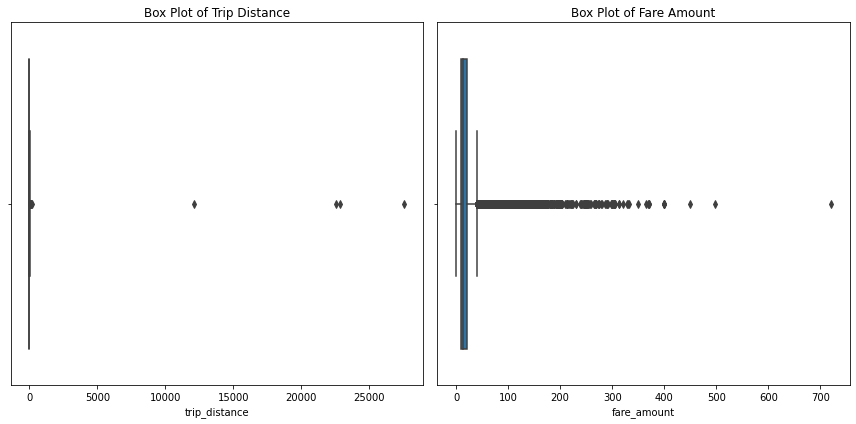

Unrealistic Fare Amounts:
 VendorID ... Airport_fee_combined
7957 2 ... 1.25
7999 2 ... 1.25
19119 2 ... 1.25
46148 2 ... 0.00
72738 2 ... 1.75
91744 2 ... 0.00
127269 2 ... 1.75
133178 2 ... 0.00
133406 1 ... 0.00
159776 1 ... 0.00
166217 2 ... 0.00
166811 2 ... 1.75
169258 2 ... 0.00
170657 2 ... 0.00
177601 2 ... 0.00
184968 2 ... 0.00
209007 2 ... 1.75
213120 2 ... 1.75
245971 2 ... 1.75
254554 2 ... 1.75
260597 2 ... 0.00
265415 2 ... 0.00
281862 2 ... 0.00
284103 2 ... 0.00

[24 rows x 17 columns]

Unrealistic Trip Distances:
 VendorID ... Airport_fee_combined
66778 2 ... 0.0
124277 2 ... 0.0
144870 2 ... 0.0
240276 2 ... 0.0

[4 rows x 17 columns]

Invalid Payment Types:
 VendorID ... Airport_fee_combined
9 2 ... 0.0
33 2 ... 0.0
36 2 ... 0.0
37 2 ... 0.0
38 2 ... 0.0
... ... ... ...
284336 2 ... 0.0
284374 2 ... 0.0
284462 2 ... 0.0
284468 1 ... 0.0
284481 2 ... 0.0

[13168 rows x 17 columns]

In [0]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Describe the data
print("Descriptive Statistics:")
print(df_taxi_data.describe(include='all'))

# Step 2: Visual inspection for outliers
plt.figure(figsize=(12, 6))

# Box plot for trip_distance
plt.subplot(1, 2, 1)
sns.boxplot(x=df_taxi_data['trip_distance'])
plt.title('Box Plot of Trip Distance')

# Box plot for fare_amount
plt.subplot(1, 2, 2)
sns.boxplot(x=df_taxi_data['fare_amount'])
plt.title('Box Plot of Fare Amount')

plt.tight_layout()
plt.show()

# Step 3: Check for potential out-of-place values
# Check for unrealistic fare amounts (e.g., negative values or extremely high values)
unrealistic_fares = df_taxi_data[(df_taxi_data['fare_amount'] < 0) | (df_taxi_data['fare_amount'] > 300)]
print("\nUnrealistic Fare Amounts:")
print(unrealistic_fares)

# Check for unrealistic trip distances (e.g., negative or extremely high values)
unrealistic_distances = df_taxi_data[(df_taxi_data['trip_distance'] < 0) | (df_taxi_data['trip_distance'] > 250)]
print("\nUnrealistic Trip Distances:")
print(unrealistic_distances)

# Check for invalid payment types (assuming valid types are 1 and 2)
invalid_payment_types = df_taxi_data[~df_taxi_data['payment_type'].isin([1, 2])]
print("\nInvalid Payment Types:")
print(invalid_payment_types)


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [0]:
# remove passenger_count > 6

df_taxi_data = df_taxi_data[df_taxi_data['passenger_count'] <= 6]

In [0]:
# Continue with outlier handling

# Fixing Outliers

# 1. Entries where trip_distance is nearly 0 and fare_amount is more than 300
df_taxi_data.loc[(df_taxi_data['trip_distance'] < 1) & (df_taxi_data['fare_amount'] > 300), 'fare_amount'] = 0

# 2. Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df_taxi_data.loc[(df_taxi_data['trip_distance'] == 0) & (df_taxi_data['fare_amount'] == 0) & (df_taxi_data['PULocationID'] != df_taxi_data['DOLocationID']), 'trip_distance'] = 0
df_taxi_data.loc[(df_taxi_data['trip_distance'] == 0) & (df_taxi_data['fare_amount'] == 0) & (df_taxi_data['PULocationID'] != df_taxi_data['DOLocationID']), 'fare_amount'] = 0

# 3. Entries where trip_distance is more than 250 miles
df_taxi_data.loc[df_taxi_data['trip_distance'] > 250, 'trip_distance'] = 250  # or set to NaN, or remove the entry

# 4. Entries where payment_type is 0
df_taxi_data.loc[df_taxi_data['payment_type'] == 0, 'payment_type'] = 1  # Replace with a valid payment type, e.g., 1

# Display cleaned DataFrame
print("\nCleaned DataFrame:")
print(df_taxi_data.head())

Cleaned DataFrame:
 VendorID tpep_pickup_datetime ... congestion_surcharge Airport_fee_combined
0 1 2023-01-01 00:54:15 ... 2.5 0.00
1 2 2023-01-01 00:20:37 ... 2.5 0.00
2 2 2023-01-01 00:42:30 ... 2.5 0.00
3 1 2023-01-01 00:18:33 ... 2.5 1.25
4 1 2023-01-01 00:15:25 ... 2.5 0.00

[5 rows x 17 columns]

In [0]:
# Do any columns need standardising?

# Standardize passenger_count to integers
df_taxi_data['passenger_count'] = df_taxi_data['passenger_count'].astype(int)

# Standardize RatecodeID to integers
df_taxi_data['RatecodeID'] = df_taxi_data['RatecodeID'].astype(int)

# Standardize payment_type to integers
df_taxi_data['payment_type'] = df_taxi_data['payment_type'].astype(int)

# Convert datetime columns to datetime objects
df_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(df_taxi_data['tpep_pickup_datetime'])
df_taxi_data['tpep_dropoff_datetime'] = pd.to_datetime(df_taxi_data['tpep_dropoff_datetime'])

In [0]:
df_taxi_data.head()

Out[37]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1 
 1.30 
 1 
 90 
 211 
 1 
 9.3 
 3.50 
 2.85 
 0.00 
 1.0 
 17.15 
 2.5 
 0.00 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1 
 5.35 
 1 
 236 
 244 
 1 
 23.3 
 1.00 
 5.66 
 0.00 
 1.0 
 33.96 
 2.5 
 0.00 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1 
 4.13 
 1 
 79 
 236 
 1 
 19.8 
 1.00 
 4.96 
 0.00 
 1.0 
 29.76 
 2.5 
 0.00 
 
 
 3 
 1 
 2023-01-01 00:18:33 
 2023-01-01 00:54:44 
 1 
 21.00 
 2 
 132 
 238 
 1 
 70.0 
 3.75 
 0.00 
 6.55 
 1.0 
 81.80 
 2.5 
 1.25 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2 
 0.90 
 1 
 148 
 114 
 1 
 7.9 
 3.50 
 1.00 
 0.00 
 1.0 
 13.90 
 2.5 
 0.00

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [0]:
df_taxi_data.columns.tolist()

Out[38]: ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

All the below fields are numerical as it is monetary paramters.

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

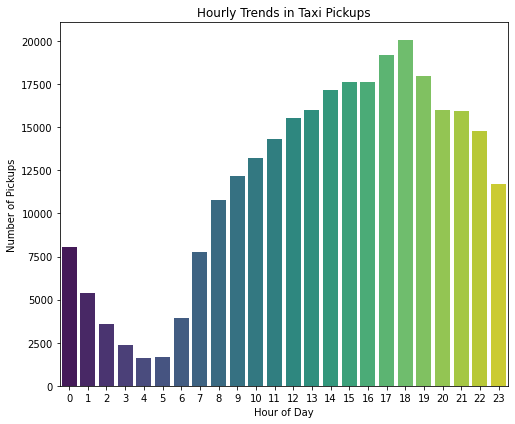

In [0]:
# Find and show the hourly trends in taxi pickups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert 'tpep_pickup_datetime' to datetime
df_taxi_data['tpep_pickup_datetime'] = pd.to_datetime(df_taxi_data['tpep_pickup_datetime'])

# Extract hour, day of the week, and month
df_taxi_data['hour'] = df_taxi_data['tpep_pickup_datetime'].dt.hour
df_taxi_data['day_of_week'] = df_taxi_data['tpep_pickup_datetime'].dt.day_name()  # Get day names
df_taxi_data['month'] = df_taxi_data['tpep_pickup_datetime'].dt.month_name()  # Get month names

# Count pickups by hour
hourly_pickups = df_taxi_data['hour'].value_counts().sort_index()

# Count pickups by day of the week
daily_pickups = df_taxi_data['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count pickups by month
monthly_pickups = df_taxi_data['month'].value_counts().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting hourly trends in taxi pickups
plt.figure(figsize=(20, 6))

# Hourly Trends
plt.subplot(1, 3, 1)
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette='viridis')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')

plt.tight_layout()
plt.show()

In [0]:
# Find and show the daily trends in taxi pickups (days of the week)

# Daily Trends
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='viridis')
plt.title('Daily Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

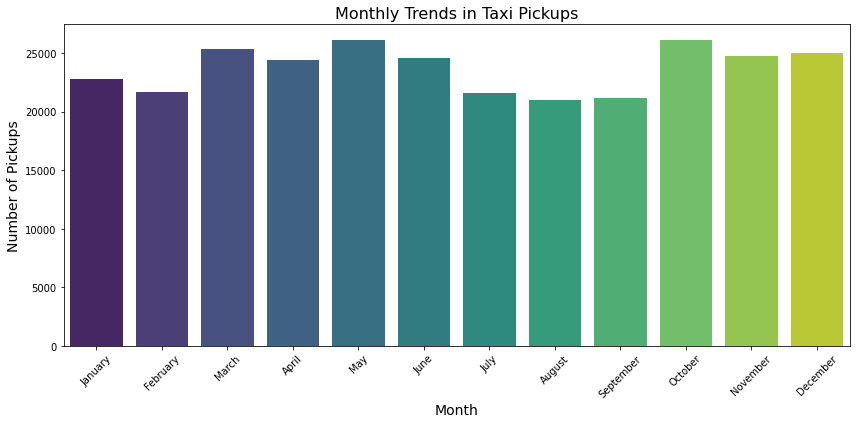

In [0]:
# Show the monthly trends in pickups

# Monthly Trends
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='viridis')
plt.title('Monthly Trends in Taxi Pickups', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Check for zero and negative values
zero_negative_fare = df_taxi_data['fare_amount'] <= 0
zero_negative_tip = df_taxi_data['tip_amount'] < 0
zero_negative_total = df_taxi_data['total_amount'] <= 0
zero_negative_distance = df_taxi_data['trip_distance'] < 0

print("\nZero or Negative Values in fare_amount:")
print(df_taxi_data[zero_negative_fare])

print("\nZero or Negative Values in tip_amount:")
print(df_taxi_data[zero_negative_tip])

print("\nZero or Negative Values in total_amount:")
print(df_taxi_data[zero_negative_total])

print("\nZero or Negative Values in trip_distance:")
print(df_taxi_data[zero_negative_distance])

# 2. Summary statistics
print("\nSummary Statistics:")
print(df_taxi_data.describe())

# 3. Visual Inspection
plt.figure(figsize=(12, 8))

# Fare Amount Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_taxi_data['fare_amount'], bins=10, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')

# Tip Amount Distribution
plt.subplot(2, 2, 2)
sns.histplot(df_taxi_data['tip_amount'], bins=10, kde=True)
plt.title('Distribution of Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')

# Total Amount Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_taxi_data['total_amount'], bins=10, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')

# Trip Distance Distribution
plt.subplot(2, 2, 4)
sns.histplot(df_taxi_data['trip_distance'], bins=10, kde=True)
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Zero or Negative Values in fare_amount:
 VendorID tpep_pickup_datetime ... day_of_week month
6636 1 2023-01-10 21:32:31 ... Tuesday January
7829 1 2023-01-12 13:13:32 ... Thursday January
8142 2 2023-01-12 19:13:41 ... Thursday January
8446 1 2023-01-13 08:00:04 ... Friday January
11559 2 2023-01-17 12:37:35 ... Tuesday January
... ... ... ... ... ...
258673 1 2023-07-24 15:49:15 ... Monday July
260941 1 2023-07-27 14:06:55 ... Thursday July
265415 2 2023-09-02 22:01:05 ... Saturday September
268980 1 2023-09-07 20:37:43 ... Thursday September
271850 1 2023-09-11 08:55:41 ... Monday September

[109 rows x 20 columns]

Zero or Negative Values in tip_amount:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_combined, hour, day_of_week, month]
Index: []

Zero or Negative Values in total_amount:
 VendorID tpep_pickup_datetime ... day_of_week month
8142 2 2023-01-12 19:13:41 ... Thursday January
8446 1 2023-01-13 08:00:04 ... Friday January
11559 2 2023-01-17 12:37:35 ... Tuesday January
12438 1 2023-01-18 15:00:28 ... Wednesday January
17155 1 2023-01-24 17:19:45 ... Tuesday January
... ... ... ... ... ...
239356 1 2023-05-25 14:32:58 ... Thursday May
244128 1 2023-07-03 19:09:35 ... Monday July
248888 2 2023-07-11 14:13:25 ... Tuesday July
258673 1 2023-07-24 15:49:15 ... Monday July
271850 1 2023-09-11 08:55:41 ... Monday September

[61 rows x 20 columns]

Zero or Negative Values in trip_distance:
Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee_combined, hour, day_of_week, month]
Index: []

Summary Statistics:
 VendorID passenger_count ... Airport_fee_combined hour
count 284495.000000 284495.000000 ... 284495.000000 284495.000000
mean 1.732153 1.355156 ... 0.136664 14.264697
std 0.447732 0.880561 ... 0.455565 5.807381
min 1.000000 0.000000 ... 0.000000 0.000000
25% 1.000000 1.000000 ... 0.000000 11.000000
50% 2.000000 1.000000 ... 0.000000 15.000000
75% 2.000000 1.000000 ... 0.000000 19.000000
max 6.000000 6.000000 ... 1.750000 23.000000

[8 rows x 16 columns]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [0]:
# Create a df with non zero entries for the selected parameters.

# Create a DataFrame with non-zero entries for the selected parameters
non_zero_df = df_taxi_data[
    (df_taxi_data['fare_amount'] > 0) &
    (df_taxi_data['tip_amount'] > 0) &
    (df_taxi_data['total_amount'] > 0) &
    (df_taxi_data['trip_distance'] > 0)
]

# Display the new DataFrame with non-zero entries
print("\nDataFrame with Non-Zero Entries:")
print(non_zero_df)

DataFrame with Non-Zero Entries:
 VendorID tpep_pickup_datetime ... day_of_week month
0 1 2023-01-01 00:54:15 ... Sunday January
1 2 2023-01-01 00:20:37 ... Sunday January
2 2 2023-01-01 00:42:30 ... Sunday January
4 1 2023-01-01 00:15:25 ... Sunday January
5 1 2023-01-01 00:38:19 ... Sunday January
... ... ... ... ... ...
284490 2 2023-09-29 23:09:47 ... Friday September
284491 2 2023-09-29 23:16:04 ... Friday September
284492 2 2023-09-29 23:04:33 ... Friday September
284493 2 2023-09-29 23:46:15 ... Friday September
284494 2 2023-09-29 23:55:26 ... Friday September

[218088 rows x 20 columns]

In [0]:
non_zero_df.head()

Out[44]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 hour 
 day_of_week 
 month 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1 
 1.30 
 1 
 90 
 211 
 1 
 9.3 
 3.5 
 2.85 
 0.0 
 1.0 
 17.15 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1 
 5.35 
 1 
 236 
 244 
 1 
 23.3 
 1.0 
 5.66 
 0.0 
 1.0 
 33.96 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1 
 4.13 
 1 
 79 
 236 
 1 
 19.8 
 1.0 
 4.96 
 0.0 
 1.0 
 29.76 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2 
 0.90 
 1 
 148 
 114 
 1 
 7.9 
 3.5 
 1.00 
 0.0 
 1.0 
 13.90 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 
 
 5 
 1 
 2023-01-01 00:38:19 
 2023-01-01 00:42:28 
 1 
 0.60 
 1 
 263 
 236 
 1 
 5.1 
 3.5 
 1.51 
 0.0 
 1.0 
 11.61 
 2.5 
 0.0 
 0 
 Sunday 
 January

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [0]:
# Group data by month and analyse monthly revenue

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract year and month from the pickup datetime
non_zero_df['year_month'] = non_zero_df['tpep_pickup_datetime'].dt.to_period('M')

# Group by year_month and sum the total_amount
monthly_revenue = non_zero_df.groupby('year_month')['total_amount'].sum().reset_index()

# Convert period back to datetime for plotting
monthly_revenue['year_month'] = monthly_revenue['year_month'].dt.to_timestamp()

# Plot the monthly revenue trend
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['year_month'], monthly_revenue['total_amount'], marker='o', linestyle='-')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [0]:
# Calculate proportion of each quarter

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract the quarter from the pickup datetime
non_zero_df['quarter'] = non_zero_df['tpep_pickup_datetime'].dt.quarter

# Group by quarter and sum the total_amount
quarterly_revenue = non_zero_df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate the total revenue for the year
total_revenue = quarterly_revenue['total_amount'].sum()

# Calculate the proportion of each quarter
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue) * 100

# Display the quarterly revenue and its proportion
print("Quarterly Revenue and Proportion:")
print(quarterly_revenue)

Quarterly Revenue and Proportion:
 quarter total_amount proportion
0 1 1531692.60 23.721080
1 2 1726025.81 26.730688
2 3 1447417.47 22.415925
3 4 1751958.78 27.132308

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip_distance and fare_amount: 0.93

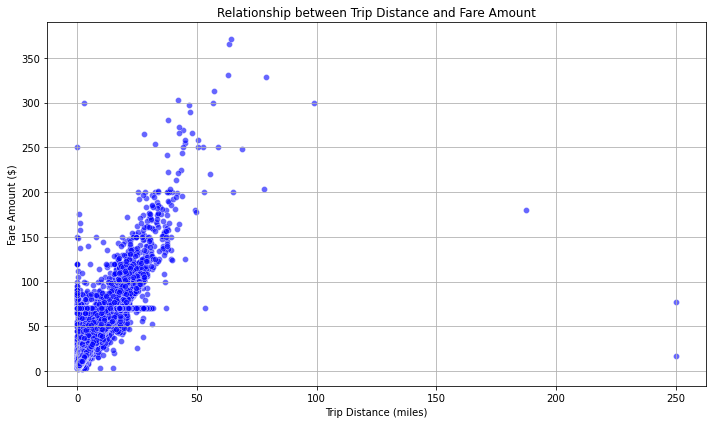

In [0]:
# Show how trip fare is affected by distance

# Remove trips with trip_distance = 0
non_zero_df = non_zero_df[non_zero_df['trip_distance'] > 0]

# Calculate the correlation between trip_distance and fare_amount
correlation = non_zero_df['trip_distance'].corr(non_zero_df['fare_amount'])

# Display the correlation value
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_zero_df, x='trip_distance', y='fare_amount', color='blue', alpha=0.6)
plt.title('Relationship between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid()
plt.tight_layout()
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare_amount and trip_duration: 0.32

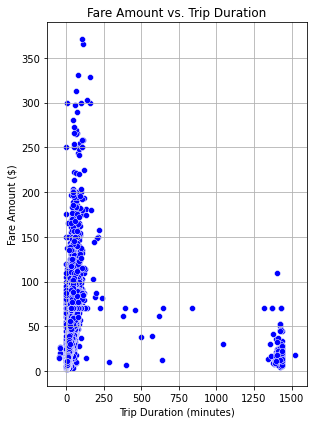

In [0]:
# Show relationship between fare and trip duration


# Convert pickup and dropoff datetime to datetime format
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])
non_zero_df['tpep_dropoff_datetime'] = pd.to_datetime(non_zero_df['tpep_dropoff_datetime'])

# Calculate Trip Duration in minutes
non_zero_df['trip_duration'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate and visualize correlation between fare_amount and trip_duration
correlation_fare_duration = non_zero_df['fare_amount'].corr(non_zero_df['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {correlation_fare_duration:.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(data=non_zero_df, x='trip_duration', y='fare_amount', color='blue')
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid()

plt.tight_layout()
plt.show()


Correlation between fare_amount and passenger_count: 0.04

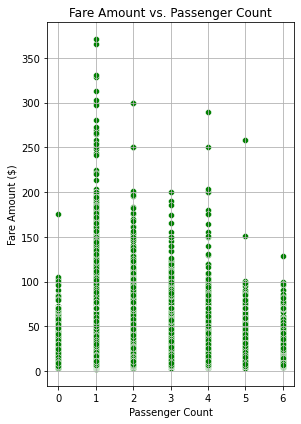

In [0]:
# Show relationship between fare and number of passengers

# Calculate and visualize correlation between fare_amount and passenger_count

correlation_fare_passenger = non_zero_df['fare_amount'].corr(non_zero_df['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {correlation_fare_passenger:.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 2)
sns.scatterplot(data=non_zero_df, x='passenger_count', y='fare_amount', color='green')
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid()

plt.tight_layout()
plt.show()

Correlation between tip_amount and trip_distance: 0.78

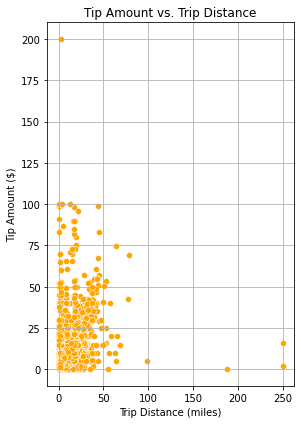

In [0]:
# Show relationship between tip and trip distance

# Calculate and visualize correlation between tip_amount and trip_distance
correlation_tip_distance = non_zero_df['tip_amount'].corr(non_zero_df['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance:.2f}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(data=non_zero_df, x='trip_distance', y='tip_amount', color='orange')
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid()

plt.tight_layout()
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
 payment_type count
0 1 218083
1 4 3
2 2 1
3 3 1

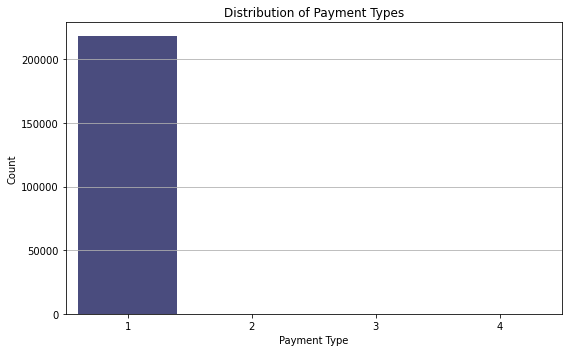

In [0]:
# Analyse the distribution of different payment types (payment_type).

# Count occurrences of each payment type
payment_counts = non_zero_df['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']

# Display the counts
print("Payment Type Distribution:")
print(payment_counts)

# Visualize the distribution of payment types
plt.figure(figsize=(8, 5))
sns.barplot(data=payment_counts, x='payment_type', y='count', palette='viridis')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [0]:
pip install geopandas

Python interpreter will be restarted.
Requirement already satisfied: geopandas in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (0.13.2)
Requirement already satisfied: pyproj>=3.0.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from geopandas) (3.5.0)
Requirement already satisfied: pandas>=1.1.0 in /databricks/python3/lib/python3.8/site-packages (from geopandas) (1.2.4)
Requirement already satisfied: packaging in /databricks/python3/lib/python3.8/site-packages (from geopandas) (20.9)
Requirement already satisfied: fiona>=1.8.19 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from geopandas) (1.8.20)
Requirement already satisfied: shapely>=1.7.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from geopandas) (2.0.7)
Requirement already satisfied: six>=1.7 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (1.15.0)
Requirement already satisfied: setuptools in /usr/local/lib/python3.8/dist-packages (from fiona>=1.8.19->geopandas) (52.0.0)
Requirement already satisfied: click>=4.0 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (8.1.8)
Requirement already satisfied: certifi in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (2020.12.5)
Requirement already satisfied: munch in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (4.0.0)
Requirement already satisfied: cligj>=0.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (0.7.2)
Requirement already satisfied: click-plugins>=1.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (1.1.1)
Requirement already satisfied: attrs>=17 in /databricks/python3/lib/python3.8/site-packages (from fiona>=1.8.19->geopandas) (20.3.0)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.1.0->geopandas) (2020.5)
Requirement already satisfied: numpy>=1.16.5 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.1.0->geopandas) (1.20.1)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas>=1.1.0->geopandas) (2.8.1)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging->geopandas) (2.4.7)
Python interpreter will be restarted.

In [0]:
%sh pip install fiona==1.9.6



Collecting fiona==1.9.6
 Downloading fiona-1.9.6-cp38-cp38-manylinux2014_x86_64.whl (15.7 MB)
Requirement already satisfied: click~=8.0 in /databricks/python3/lib/python3.8/site-packages (from fiona==1.9.6) (8.1.8)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from fiona==1.9.6) (1.15.0)
Requirement already satisfied: certifi in /databricks/python3/lib/python3.8/site-packages (from fiona==1.9.6) (2020.12.5)
Requirement already satisfied: cligj>=0.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from fiona==1.9.6) (0.7.2)
Requirement already satisfied: click-plugins>=1.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from fiona==1.9.6) (1.1.1)
Requirement already satisfied: attrs>=19.2.0 in /databricks/python3/lib/python3.8/site-packages (from fiona==1.9.6) (20.3.0)
Requirement already satisfied: importlib-metadata in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from fiona==1.9.6) (8.5.0)
Requirement already satisfied: zipp>=3.20 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/lib/python3.8/site-packages (from importlib-metadata->fiona==1.9.6) (3.20.2)
Installing collected packages: fiona
 Attempting uninstall: fiona
 Found existing installation: Fiona 1.8.20
 Uninstalling Fiona-1.8.20:
 Successfully uninstalled Fiona-1.8.20
Successfully installed fiona-1.9.6
WARNING: You are using pip version 21.0.1; however, version 25.0.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-0074a4a3-6931-4c73-b68b-8359f4288dc5/bin/python -m pip install --upgrade pip' command.

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [0]:
import geopandas as gpd

# Path to the shapefile
shapefile_path = '/dbfs/FileStore/FDL_Krypton/taxi_zones.shp'

# Load the shapefile as a GeoDataFrame
zones= gpd.read_file(shapefile_path) # read the .shp file using gpd

# Display the first few rows of the GeoDataFrame
zones.head()

Out[52]:

OBJECTID 
 Shape_Leng 
 Shape_Area 
 zone 
 LocationID 
 borough 
 geometry 
 
 
 
 
 0 
 1 
 0.116357 
 0.000782 
 Newark Airport 
 1 
 EWR 
 POLYGON ((933100.918 192536.086, 933091.011 19... 
 
 
 1 
 2 
 0.433470 
 0.004866 
 Jamaica Bay 
 2 
 Queens 
 MULTIPOLYGON (((1033269.244 172126.008, 103343... 
 
 
 2 
 3 
 0.084341 
 0.000314 
 Allerton/Pelham Gardens 
 3 
 Bronx 
 POLYGON ((1026308.770 256767.698, 1026495.593 ... 
 
 
 3 
 4 
 0.043567 
 0.000112 
 Alphabet City 
 4 
 Manhattan 
 POLYGON ((992073.467 203714.076, 992068.667 20... 
 
 
 4 
 5 
 0.092146 
 0.000498 
 Arden Heights 
 5 
 Staten Island 
 POLYGON ((935843.310 144283.336, 936046.565 14...

In [0]:
zones.shape

Out[53]: (263, 7)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 OBJECTID 263 non-null int64 
 1 Shape_Leng 263 non-null float64 
 2 Shape_Area 263 non-null float64 
 3 zone 263 non-null object 
 4 LocationID 263 non-null int64 
 5 borough 263 non-null object 
 6 geometry 263 non-null geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB
None
Out[54]:

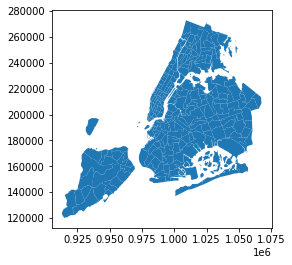

<AxesSubplot:>

In [0]:
 print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



In [0]:
non_zero_df.head()

Out[55]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 hour 
 day_of_week 
 month 
 year_month 
 quarter 
 trip_duration 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1 
 1.30 
 1 
 90 
 211 
 1 
 9.3 
 3.5 
 2.85 
 0.0 
 1.0 
 17.15 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 7.466667 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1 
 5.35 
 1 
 236 
 244 
 1 
 23.3 
 1.0 
 5.66 
 0.0 
 1.0 
 33.96 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 13.100000 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1 
 4.13 
 1 
 79 
 236 
 1 
 19.8 
 1.0 
 4.96 
 0.0 
 1.0 
 29.76 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 15.500000 
 
 
 4 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2 
 0.90 
 1 
 148 
 114 
 1 
 7.9 
 3.5 
 1.00 
 0.0 
 1.0 
 13.90 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 7.166667 
 
 
 5 
 1 
 2023-01-01 00:38:19 
 2023-01-01 00:42:28 
 1 
 0.60 
 1 
 263 
 236 
 1 
 5.1 
 3.5 
 1.51 
 0.0 
 1.0 
 11.61 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 4.150000

**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [0]:
# Merge zones and trip records using locationID and PULocationID

# Merge the DataFrames using PULocationID and LocationID
merged_trip_zone = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the merged DataFrame
print("\nMerged Data:")
print(merged_trip_zone)
merged_trip_zone

Merged Data:
 VendorID ... geometry
0 1 ... POLYGON ((985265.129 208165.863, 985125.733 20...
1 2 ... POLYGON ((995940.048 221122.920, 995812.322 22...
2 2 ... POLYGON ((988746.067 202151.955, 988733.885 20...
3 1 ... POLYGON ((988552.836 201677.665, 988387.669 20...
4 1 ... POLYGON ((997493.323 220912.386, 997355.264 22...
... ... ... ...
218090 2 ... POLYGON ((989131.643 205749.904, 989084.531 20...
218091 2 ... POLYGON ((983827.650 201526.658, 983727.737 20...
218092 2 ... POLYGON ((992224.354 214415.293, 992096.999 21...
218093 2 ... POLYGON ((986694.313 214463.846, 986568.184 21...
218094 2 ... POLYGON ((992073.467 203714.076, 992068.667 20...

[218095 rows x 30 columns]
Out[56]:

VendorID 
 tpep_pickup_datetime 
 tpep_dropoff_datetime 
 passenger_count 
 trip_distance 
 RatecodeID 
 PULocationID 
 DOLocationID 
 payment_type 
 fare_amount 
 extra 
 tip_amount 
 tolls_amount 
 improvement_surcharge 
 total_amount 
 congestion_surcharge 
 Airport_fee_combined 
 hour 
 day_of_week 
 month 
 year_month 
 quarter 
 trip_duration 
 OBJECTID 
 Shape_Leng 
 Shape_Area 
 zone 
 LocationID 
 borough 
 geometry 
 
 
 
 
 0 
 1 
 2023-01-01 00:54:15 
 2023-01-01 01:01:43 
 1 
 1.30 
 1 
 90 
 211 
 1 
 9.3 
 3.5 
 2.85 
 0.0 
 1.0 
 17.15 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 7.466667 
 90.0 
 0.030759 
 0.000055 
 Flatiron 
 90.0 
 Manhattan 
 POLYGON ((985265.129 208165.863, 985125.733 20... 
 
 
 1 
 2 
 2023-01-01 00:20:37 
 2023-01-01 00:33:43 
 1 
 5.35 
 1 
 236 
 244 
 1 
 23.3 
 1.0 
 5.66 
 0.0 
 1.0 
 33.96 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 13.100000 
 236.0 
 0.044252 
 0.000103 
 Upper East Side North 
 236.0 
 Manhattan 
 POLYGON ((995940.048 221122.920, 995812.322 22... 
 
 
 2 
 2 
 2023-01-01 00:42:30 
 2023-01-01 00:58:00 
 1 
 4.13 
 1 
 79 
 236 
 1 
 19.8 
 1.0 
 4.96 
 0.0 
 1.0 
 29.76 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 15.500000 
 79.0 
 0.042625 
 0.000108 
 East Village 
 79.0 
 Manhattan 
 POLYGON ((988746.067 202151.955, 988733.885 20... 
 
 
 3 
 1 
 2023-01-01 00:15:25 
 2023-01-01 00:22:35 
 2 
 0.90 
 1 
 148 
 114 
 1 
 7.9 
 3.5 
 1.00 
 0.0 
 1.0 
 13.90 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 7.166667 
 148.0 
 0.039131 
 0.000070 
 Lower East Side 
 148.0 
 Manhattan 
 POLYGON ((988552.836 201677.665, 988387.669 20... 
 
 
 4 
 1 
 2023-01-01 00:38:19 
 2023-01-01 00:42:28 
 1 
 0.60 
 1 
 263 
 236 
 1 
 5.1 
 3.5 
 1.51 
 0.0 
 1.0 
 11.61 
 2.5 
 0.0 
 0 
 Sunday 
 January 
 2023-01 
 1 
 4.150000 
 263.0 
 0.037017 
 0.000066 
 Yorkville West 
 263.0 
 Manhattan 
 POLYGON ((997493.323 220912.386, 997355.264 22... 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 218090 
 2 
 2023-09-29 23:09:47 
 2023-09-29 23:35:43 
 1 
 6.21 
 1 
 107 
 223 
 1 
 29.6 
 1.0 
 6.92 
 0.0 
 1.0 
 41.52 
 2.5 
 0.0 
 23 
 Friday 
 September 
 2023-09 
 3 
 25.933333 
 107.0 
 0.038041 
 0.000075 
 Gramercy 
 107.0 
 Manhattan 
 POLYGON ((989131.643 205749.904, 989084.531 20... 
 
 
 218091 
 2 
 2023-09-29 23:16:04 
 2023-09-29 23:22:58 
 1 
 0.98 
 1 
 211 
 148 
 1 
 8.6 
 1.0 
 2.72 
 0.0 
 1.0 
 16.32 
 2.5 
 0.0 
 23 
 Friday 
 September 
 2023-09 
 3 
 6.900000 
 211.0 
 0.025235 
 0.000040 
 SoHo 
 211.0 
 Manhattan 
 POLYGON ((983827.650 201526.658, 983727.737 20... 
 
 
 218092 
 2 
 2023-09-29 23:04:33 
 2023-09-29 23:18:19 
 5 
 2.76 
 1 
 162 
 239 
 1 
 15.6 
 1.0 
 4.12 
 0.0 
 1.0 
 24.72 
 2.5 
 0.0 
 23 
 Friday 
 September 
 2023-09 
 3 
 13.766667 
 162.0 
 0.035270 
 0.000048 
 Midtown East 
 162.0 
 Manhattan 
 POLYGON ((992224.354 214415.293, 992096.999 21... 
 
 
 218093 
 2 
 2023-09-29 23:46:15 
 2023-09-29 23:53:20 
 1 
 1.79 
 1 
 48 
 238 
 1 
 10.7 
 1.0 
 3.14 
 0.0 
 1.0 
 18.84 
 2.5 
 0.0 
 23 
 Friday 
 September 
 2023-09 
 3 
 7.083333 
 48.0 
 0.043747 
 0.000094 
 Clinton East 
 48.0 
 Manhattan 
 POLYGON ((986694.313 214463.846, 986568.184 21... 
 
 
 218094 
 2 
 2023-09-29 23:55:26 
 2023-09-30 00:03:38 
 1 
 1.92 
 1 
 4 
 137 
 1 
 10.7 
 1.0 
 1.57 
 0.0 
 1.0 
 17.27 
 2.5 
 0.0 
 23 
 Friday 
 September 
 2023-09 
 3 
 8.200000 
 4.0 
 0.043567 
 0.000112 
 Alphabet City 
 4.0 
 Manhattan 
 POLYGON ((992073.467 203714.076, 992068.667 20... 
 
 
 
 218095 rows × 30 columns

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [0]:
# Group data by location and calculate the number of trips

trip_counts = merged_trip_zone.groupby('LocationID').size().reset_index(name='number_of_trips')

# Display the trip counts by location
print("Number of Trips by Location:")
print(trip_counts)

Number of Trips by Location:
 LocationID number_of_trips
0 1.0 5
1 4.0 245
2 7.0 44
3 8.0 1
4 9.0 1
.. ... ...
173 257.0 2
174 260.0 18
175 261.0 1015
176 262.0 3105
177 263.0 4381

[178 rows x 2 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [0]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trip_counts = zones.merge(trip_counts, on='LocationID', how='left')

# Fill NaN values with 0 for locations with no trips
zones_with_trip_counts['number_of_trips'] = zones_with_trip_counts['number_of_trips'].fillna(0)

# Display the merged GeoDataFrame
print("Zones GeoDataFrame with Trip Counts:")
print(zones_with_trip_counts[['LocationID', 'borough', 'number_of_trips']])

Zones GeoDataFrame with Trip Counts:
 LocationID borough number_of_trips
0 1 EWR 5.0
1 2 Queens 0.0
2 3 Bronx 0.0
3 4 Manhattan 245.0
4 5 Staten Island 0.0
.. ... ... ...
258 259 Bronx 0.0
259 260 Queens 18.0
260 261 Manhattan 1015.0
261 262 Manhattan 3105.0
262 263 Manhattan 4381.0

[263 rows x 3 columns]

In [0]:
zones_with_trip_counts['number_of_trips'] = zones_with_trip_counts['number_of_trips'].astype(int)
zones_with_trip_counts.head()

Out[61]:

OBJECTID 
 Shape_Leng 
 Shape_Area 
 zone 
 LocationID 
 borough 
 geometry 
 number_of_trips 
 
 
 
 
 0 
 1 
 0.116357 
 0.000782 
 Newark Airport 
 1 
 EWR 
 POLYGON ((933100.918 192536.086, 933091.011 19... 
 5 
 
 
 1 
 2 
 0.433470 
 0.004866 
 Jamaica Bay 
 2 
 Queens 
 MULTIPOLYGON (((1033269.244 172126.008, 103343... 
 0 
 
 
 2 
 3 
 0.084341 
 0.000314 
 Allerton/Pelham Gardens 
 3 
 Bronx 
 POLYGON ((1026308.770 256767.698, 1026495.593 ... 
 0 
 
 
 3 
 4 
 0.043567 
 0.000112 
 Alphabet City 
 4 
 Manhattan 
 POLYGON ((992073.467 203714.076, 992068.667 20... 
 245 
 
 
 4 
 5 
 0.092146 
 0.000498 
 Arden Heights 
 5 
 Staten Island 
 POLYGON ((935843.310 144283.336, 936046.565 14... 
 0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

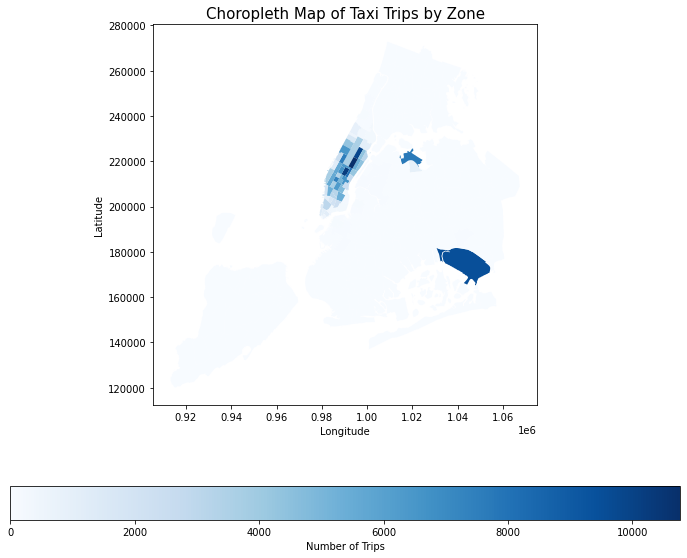

In [0]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

# Plot the map
zones_with_trip_counts.plot(column='number_of_trips', ax=ax, legend=True,
                            legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"},
                            cmap='Blues')  # Using a different color map (Blues) for visualization

# Set titles and labels
ax.set_title('Choropleth Map of Taxi Trips by Zone', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the plot
plt.show()

In [0]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones GeoDataFrame by the number of trips
sorted_zones = zones_with_trip_counts.sort_values(by='number_of_trips', ascending=False)

# Display the sorted Zone GeoDataFrame
print("Zones sorted by number of trips:")
print(sorted_zones[['LocationID', 'borough', 'number_of_trips']])

Zones sorted by number of trips:
 LocationID borough number_of_trips
236 237 Manhattan 10764
160 161 Manhattan 10176
235 236 Manhattan 9837
131 132 Queens 9497
161 162 Manhattan 8118
.. ... ... ...
170 171 Queens 0
168 169 Bronx 0
85 86 Queens 0
166 167 Bronx 0
22 23 Staten Island 0

[263 rows x 3 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [0]:
# Find routes which have the slowest speeds at different times of the day

# Convert pickup and dropoff datetime to datetime format
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])
non_zero_df['tpep_dropoff_datetime'] = pd.to_datetime(non_zero_df['tpep_dropoff_datetime'])

# Calculate Trip Duration in minutes
non_zero_df['trip_duration'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Extract hour from pickup datetime
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# Calculate Speed for each trip
non_zero_df['speed'] = non_zero_df['trip_distance'] / (non_zero_df['trip_duration'] / 60)  # Speed = distance / time (in hours)

# Group by PULocationID, DOLocationID, and pickup_hour to calculate average speed
average_speed = non_zero_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed'].mean().reset_index()

# Identify slow routes by defining a threshold for slow speed (e.g., less than 10 mph)
slow_routes = average_speed[average_speed['speed'] < 10]  # Adjust the threshold as needed

# Display the slow routes
print("Slow Routes (Speed < 10 mph):")
print(slow_routes)

Slow Routes (Speed < 10 mph):
 PULocationID DOLocationID pickup_hour speed
1 1 1 12 9.473684
5 4 4 0 8.603774
6 4 4 1 6.432990
7 4 4 2 8.666667
8 4 4 3 7.411765
... ... ... ... ...
54304 264 264 16 9.919760
54305 264 264 17 9.950723
54306 264 264 18 9.759886
54329 265 265 16 8.869565
54333 265 265 23 6.273458

[20772 rows x 4 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18 with 15937 trips.

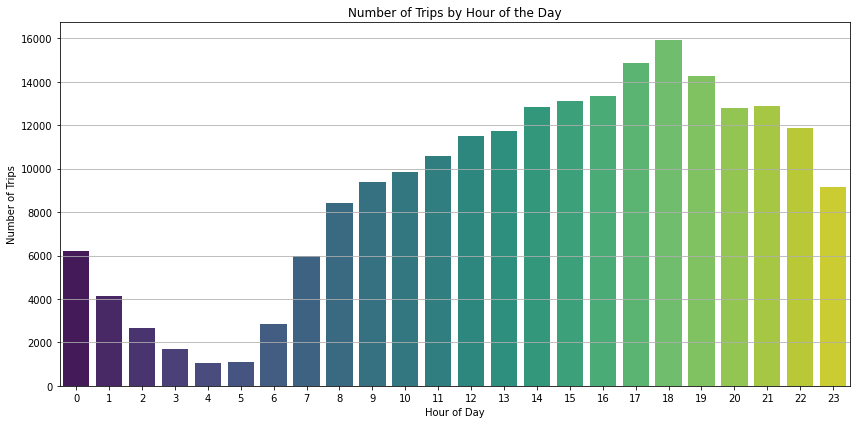

In [0]:
# Visualise the number of trips per hour and find the busiest hour

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract hour from pickup datetime
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# Count the number of trips for each hour
trip_counts_by_hour = non_zero_df['pickup_hour'].value_counts().sort_index()

# Identify the busiest hour
busiest_hour = trip_counts_by_hour.idxmax()
busiest_hour_count = trip_counts_by_hour.max()

# Display the busiest hour and the number of trips for that hour
print(f"Busiest Hour: {busiest_hour} with {busiest_hour_count} trips.")

# Visualize the number of trips by hour
plt.figure(figsize=(12, 6))
sns.barplot(x=trip_counts_by_hour.index, y=trip_counts_by_hour.values, palette='viridis')
plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [0]:
# Scale up the number of trips

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract hour from pickup datetime
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# Count the number of trips for each hour
trip_counts_by_hour = non_zero_df['pickup_hour'].value_counts().sort_index()

# Fill in the value of your sampling fraction and use that to scale up the numbers

# Define the sampling fraction (e.g., 0.1 for 10%)
sampling_fraction = 0.1  # Replace this value with your actual sampling fraction

# Identify the five busiest hours
busiest_hours = trip_counts_by_hour.nlargest(5)

# Scale up the number of trips to find actual numbers
actual_trip_counts = (busiest_hours / sampling_fraction).round()

# Display the actual number of trips in the five busiest hours
print("Actual Number of Trips in the Five Busiest Hours:")
print(actual_trip_counts)



Actual Number of Trips in the Five Busiest Hours:
18 159370.0
17 148740.0
19 142690.0
16 133550.0
15 131070.0
Name: pickup_hour, dtype: float64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [0]:
# Compare traffic trends for the week days and weekends


# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract day of the week (0=Monday, 6=Sunday)
non_zero_df['day_of_week'] = non_zero_df['tpep_pickup_datetime'].dt.dayofweek

# Create a new column to categorize as 'Weekday' or 'Weekend'
non_zero_df['day_type'] = non_zero_df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Count the number of trips for weekdays and weekends
trip_counts = non_zero_df['day_type'].value_counts()

# Display the counts
print("Trip Counts by Day Type:")
print(trip_counts)

# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(x=trip_counts.index, y=trip_counts.values, palette='viridis')
plt.title('Traffic Trends: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Trips')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Trip Counts by Day Type:
Weekday 159798
Weekend 58290
Name: day_type, dtype: int64

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [0]:
# Find top 10 pickup and dropoff zones

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract hour from pickup datetime
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# Count hourly pickups by PULocationID
hourly_pickups = non_zero_df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

# Find top 10 pickup zones based on total pickups
top_pickup_zones = hourly_pickups.groupby('PULocationID')['pickup_count'].sum().nlargest(10).reset_index()

# Count hourly dropoffs by DOLocationID
hourly_dropoffs = non_zero_df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='dropoff_count')

# Find top 10 dropoff zones based on total dropoffs
top_dropoff_zones = hourly_dropoffs.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).reset_index()

# Results
print("Top 10 Pickup Zones:")
print(top_pickup_zones)

print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)

# Visualize trends for top pickup zones
plt.figure(figsize=(14, 6))

# Plot pickup
plt.subplot(1, 2, 1)
for zone in top_pickup_zones['PULocationID']:
    zone_data = hourly_pickups[hourly_pickups['PULocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['pickup_count'], marker='o', label=f'Zone {zone}')
plt.title('Hourly Pickup Trends in Top Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(title='Pickup Zones')
plt.grid()

# Plot dropoff
plt.subplot(1, 2, 2)
for zone in top_dropoff_zones['DOLocationID']:
    zone_data = hourly_dropoffs[hourly_dropoffs['DOLocationID'] == zone]
    plt.plot(zone_data['pickup_hour'], zone_data['dropoff_count'], marker='o', label=f'Zone {zone}')
plt.title('Hourly Dropoff Trends in Top Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(0, 24))
plt.legend(title='Dropoff Zones')
plt.grid()

plt.tight_layout()
plt.show()

Top 10 Pickup Zones:
 PULocationID pickup_count
0 237 10764
1 161 10176
2 236 9837
3 132 9497
4 162 8118
5 138 7711
6 142 7548
7 186 7394
8 170 6680
9 230 6678

Top 10 Dropoff Zones:
 DOLocationID dropoff_count
0 236 10439
1 237 9676
2 161 8573
3 170 6636
4 239 6466
5 162 6357
6 142 6340
7 141 6151
8 230 6014
9 68 5616

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [0]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count total pickups by PULocationID
total_pickups = non_zero_df['PULocationID'].value_counts().reset_index()
total_pickups.columns = ['LocationID', 'TotalPickups']

# Count total dropoffs by DOLocationID
total_dropoffs = non_zero_df['DOLocationID'].value_counts().reset_index()
total_dropoffs.columns = ['LocationID', 'TotalDropoffs']

# Merge pickups and dropoffs
pickup_dropoff_ratio = total_pickups.merge(total_dropoffs, on='LocationID', how='outer')

# Calculate pickup/dropoff ratio
pickup_dropoff_ratio['Ratio'] = pickup_dropoff_ratio['TotalPickups'] / pickup_dropoff_ratio['TotalDropoffs'].replace(0, pd.NA)

# Identify top 10 and bottom 10 ratios
top_10_ratios = pickup_dropoff_ratio.nlargest(10, 'Ratio')
bottom_10_ratios = pickup_dropoff_ratio.nsmallest(10, 'Ratio')

# Display results
print("Top 10 Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

Top 10 Pickup/Dropoff Ratios:
 LocationID TotalPickups TotalDropoffs Ratio
47 70 957.0 69 13.869565
3 132 9497.0 2217 4.283717
123 207 3.0 1 3.000000
5 138 7711.0 3036 2.539855
7 186 7394.0 4514 1.638015
29 114 3106.0 2157 1.439963
26 43 3616.0 2571 1.406457
17 249 5302.0 3877 1.367552
86 215 22.0 17 1.294118
27 100 3362.0 2613 1.286644

Bottom 10 Pickup/Dropoff Ratios:
 LocationID TotalPickups TotalDropoffs Ratio
175 14 1.0 136 0.007353
117 1 5.0 672 0.007440
131 202 2.0 131 0.015267
139 257 2.0 107 0.018692
137 92 2.0 97 0.020619
126 62 2.0 80 0.025000
165 160 1.0 36 0.027778
141 220 2.0 71 0.028169
167 91 1.0 35 0.028571
155 69 1.0 31 0.032258

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [0]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones


# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract hour from pickup datetime
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# Filter for night hours (11 PM to 5 AM)
night_hours = non_zero_df[(non_zero_df['pickup_hour'] >= 23) | (non_zero_df['pickup_hour'] < 6)]

# Count hourly pickups by PULocationID during night hours
night_hourly_pickups = night_hours['PULocationID'].value_counts().reset_index()
night_hourly_pickups.columns = ['PULocationID', 'NightPickups']

# Count hourly dropoffs by DOLocationID during night hours
night_hourly_dropoffs = night_hours['DOLocationID'].value_counts().reset_index()
night_hourly_dropoffs.columns = ['DOLocationID', 'NightDropoffs']

# Find top 10 pickup zones based on night pickups
top_night_pickup_zones = night_hourly_pickups.nlargest(10, 'NightPickups')

# Find top 10 dropoff zones based on night dropoffs
top_night_dropoff_zones = night_hourly_dropoffs.nlargest(10, 'NightDropoffs')

# Display results
print("Top 10 Pickup Zones During Night Hours:")
print(top_night_pickup_zones)

print("\nTop 10 Dropoff Zones During Night Hours:")
print(top_night_dropoff_zones)

Top 10 Pickup Zones During Night Hours:
 PULocationID NightPickups
0 79 1951
1 249 1666
2 132 1503
3 48 1242
4 148 1218
5 114 1120
6 230 892
7 186 767
8 164 749
9 107 726

Top 10 Dropoff Zones During Night Hours:
 DOLocationID NightDropoffs
0 79 1058
1 170 782
2 48 767
3 107 730
4 68 706
5 141 688
6 263 647
7 249 611
8 239 600
9 236 589

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [0]:
# Filter for night hours (11 PM to 5 AM)

# Define night hours (11 PM to 5 AM)
night_hours = non_zero_df[(non_zero_df['pickup_hour'] >= 23) | (non_zero_df['pickup_hour'] < 6)]

# Calculate total revenue for night hours
night_revenue = night_hours['total_amount'].sum()

# Calculate total revenue for daytime hours (6 AM to 10 PM)
day_hours = non_zero_df[(non_zero_df['pickup_hour'] >= 6) & (non_zero_df['pickup_hour'] < 23)]
day_revenue = day_hours['total_amount'].sum()

# Calculate total revenue
total_revenue = night_revenue + day_revenue

# Calculate revenue share for night and day
night_revenue_share = (night_revenue / total_revenue) * 100 if total_revenue > 0 else 0
day_revenue_share = (day_revenue / total_revenue) * 100 if total_revenue > 0 else 0

# Display results
print(f"Total Night Revenue: ${night_revenue:.2f}")
print(f"Total Day Revenue: ${day_revenue:.2f}")
print(f"Night Revenue Share: {night_revenue_share:.2f}%")
print(f"Day Revenue Share: {day_revenue_share:.2f}%")

Total Night Revenue: $785796.21
Total Day Revenue: $5671298.45
Night Revenue Share: 12.17%
Day Revenue Share: 87.83%

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [0]:
# Analyse the fare per mile per passenger for different passenger counts

# Remove rows with passenger count 0
non_zero_df = non_zero_df[non_zero_df['passenger_count'] > 0]

# Calculate fare per mile
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Group by passenger_count and calculate average fare per mile
average_fare_per_mile = non_zero_df.groupby('passenger_count')['fare_per_mile'].mean().reset_index()

# Calculate fare per mile per passenger
average_fare_per_mile['fare_per_mile_per_passenger'] = average_fare_per_mile['fare_per_mile'] / average_fare_per_mile['passenger_count']

# Results
display(average_fare_per_mile[['passenger_count', 'fare_per_mile', 'fare_per_mile_per_passenger']])

passenger_count fare_per_mile fare_per_mile_per_passenger 1 9.816695987420408 9.816695987420408 2 10.603626390752437 5.301813195376218 3 9.312697681498214 3.1042325604994048 4 14.362072254420067 3.5905180636050167 5 8.420557575875144 1.6841115151750288 6 7.65161327371377 1.275268878952295

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [0]:
# Compare the average fare per mile for different days and for different times of the day


# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Calculate fare per mile
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Extract hour and day of the week
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour
non_zero_df['day_of_week'] = non_zero_df['tpep_pickup_datetime'].dt.day_name()  # Get day names

# Group by day of the week and calculate average fare per mile
average_fare_by_day = non_zero_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Sort days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_fare_by_day['day_of_week'] = pd.Categorical(average_fare_by_day['day_of_week'], categories=days_order, ordered=True)
average_fare_by_day = average_fare_by_day.sort_values('day_of_week')

# Group by hour and calculate average fare per mile
average_fare_by_hour = non_zero_df.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()

# Display results
print("Average Fare per Mile by Day of the Week:")
print(average_fare_by_day)

print("\nAverage Fare per Mile by Hour of the Day:")
print(average_fare_by_hour)

# Visualization
plt.figure(figsize=(14, 6))

# Bar plot for average fare per mile by day of the week
plt.subplot(1, 2, 1)
sns.barplot(data=average_fare_by_day, x='day_of_week', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45)

# Bar plot for average fare per mile by hour of the day
plt.subplot(1, 2, 2)
sns.barplot(data=average_fare_by_hour, x='pickup_hour', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))

plt.tight_layout()
plt.show()

Average Fare per Mile by Day of the Week:
 day_of_week fare_per_mile
1 Monday 9.217195
5 Tuesday 10.127238
6 Wednesday 10.236820
4 Thursday 10.132652
0 Friday 9.836204
2 Saturday 9.171544
3 Sunday 10.960699

Average Fare per Mile by Hour of the Day:
 pickup_hour fare_per_mile
0 0 8.294386
1 1 11.216691
2 2 9.235539
3 3 6.817814
4 4 13.994809
5 5 15.554895
6 6 10.669410
7 7 11.489575
8 8 9.344509
9 9 9.914812
10 10 8.580037
11 11 10.288635
12 12 9.701192
13 13 9.584783
14 14 9.639647
15 15 9.618258
16 16 12.319875
17 17 12.058531
18 18 10.214820
19 19 9.595453
20 20 8.137382
21 21 8.900381
22 22 9.384141
23 23 10.421942

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by Vendor:
 VendorID fare_per_mile
0 1 7.909306
1 2 10.621478

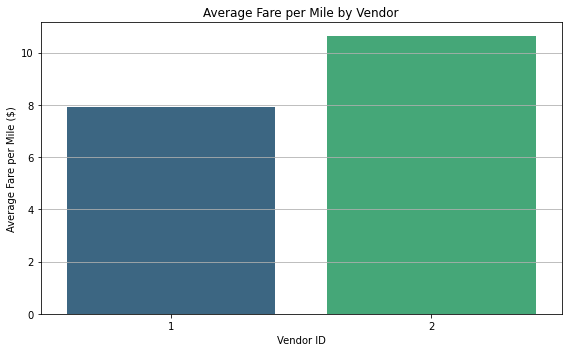

In [0]:
# Compare fare per mile for different vendors

# Calculate fare per mile
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Group by VendorID and calculate average fare per mile
average_fare_per_mile_by_vendor = non_zero_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()

# Display the results
print("Average Fare per Mile by Vendor:")
print(average_fare_per_mile_by_vendor)

# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(data=average_fare_per_mile_by_vendor, x='VendorID', y='fare_per_mile', palette='viridis')
plt.title('Average Fare per Mile by Vendor')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [0]:
# Defining distance tiers


# Calculate fare per mile
non_zero_df['fare_per_mile'] = non_zero_df['fare_amount'] / non_zero_df['trip_distance']

# Define distance tiers
def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

# Apply the distance tier function
non_zero_df['distance_tier'] = non_zero_df['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier, then calculate average fare per mile
average_fare_per_mile = non_zero_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Display the results
print("Average Fare per Mile by Vendor and Distance Tier:")
print(average_fare_per_mile)

Average Fare per Mile by Vendor and Distance Tier:
 VendorID distance_tier fare_per_mile
0 1 2 to 5 miles 6.346768
1 1 More than 5 miles 4.469525
2 1 Up to 2 miles 9.498205
3 2 2 to 5 miles 6.522207
4 2 More than 5 miles 4.483342
5 2 Up to 2 miles 14.862921

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Average Tip Percentage by Distance Tier:
 distance_tier tip_percentage
0 2 to 5 miles 23.088639
1 More than 5 miles 21.984541
2 Up to 2 miles 28.775485

Average Tip Percentage by Passenger Count:
 passenger_count tip_percentage
0 1 26.032039
1 2 25.878975
2 3 25.922974
3 4 25.993455
4 5 26.200853
5 6 26.215991

Average Tip Percentage by Pickup Hour:
 pickup_hour tip_percentage
0 0 25.674917
1 1 25.760056
2 2 26.173002
3 3 29.154013
4 4 26.952537
5 5 25.657779
6 6 24.511201
7 7 24.860752
8 8 24.805122
9 9 25.213212
10 10 25.487542
11 11 25.348410
12 12 25.168150
13 13 25.397907
14 14 25.104528
15 15 24.815251
16 16 27.030250
17 17 27.238475
18 18 27.702723
19 19 27.456250
20 20 26.219475
21 21 26.327453
22 22 25.953023
23 23 25.539808

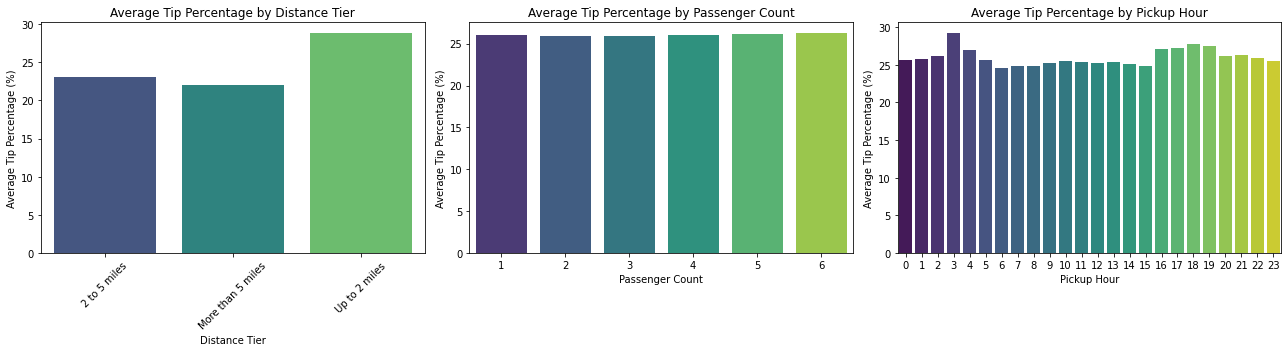

In [0]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Calculate tip percentage
non_zero_df['tip_percentage'] = (non_zero_df['tip_amount'] / non_zero_df['fare_amount']) * 100

# Extract hour from pickup datetime
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour

# 1. Analyze tip percentages based on distances
# Define distance tiers
def distance_tier(distance):
    if distance <= 2:
        return 'Up to 2 miles'
    elif 2 < distance <= 5:
        return '2 to 5 miles'
    else:
        return 'More than 5 miles'

# Apply the distance tier function
non_zero_df['distance_tier'] = non_zero_df['trip_distance'].apply(distance_tier)

# Group by distance tier and calculate average tip percentage
average_tip_by_distance = non_zero_df.groupby('distance_tier')['tip_percentage'].mean().reset_index()

# 2. Analyze tip percentages based on passenger count
average_tip_by_passenger = non_zero_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# 3. Analyze tip percentages based on pickup hour
average_tip_by_hour = non_zero_df.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Display results
print("Average Tip Percentage by Distance Tier:")
print(average_tip_by_distance)

print("\nAverage Tip Percentage by Passenger Count:")
print(average_tip_by_passenger)

print("\nAverage Tip Percentage by Pickup Hour:")
print(average_tip_by_hour)

# Visualization
plt.figure(figsize=(18, 5))

# Bar plot for average tip percentage by distance tier
plt.subplot(1, 3, 1)
sns.barplot(data=average_tip_by_distance, x='distance_tier', y='tip_percentage', palette='viridis')
plt.title('Average Tip Percentage by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip Percentage (%)')
plt.xticks(rotation=45)

# Bar plot for average tip percentage by passenger count
plt.subplot(1, 3, 2)
sns.barplot(data=average_tip_by_passenger, x='passenger_count', y='tip_percentage', palette='viridis')
plt.title('Average Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage (%)')

# Bar plot for average tip percentage by pickup hour
plt.subplot(1, 3, 3)
sns.barplot(data=average_tip_by_hour, x='pickup_hour', y='tip_percentage', palette='viridis')
plt.title('Average Tip Percentage by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Percentage (%)')

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Comparison of Trips with Tip Percentages:
 Metric Low Tip Average High Tip Average
0 fare_amount 26.271830 14.434937
1 trip_distance 4.901789 2.311543

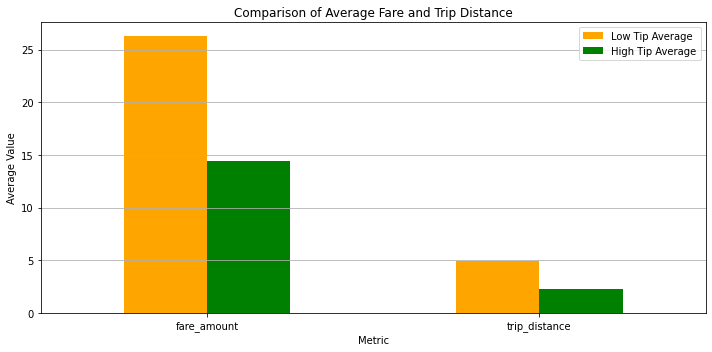

In [0]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Calculate tip percentage
non_zero_df['tip_percentage'] = (non_zero_df['tip_amount'] / non_zero_df['fare_amount']) * 100

# Filter trips with tip percentage < 10%
low_tip_trips = non_zero_df[non_zero_df['tip_percentage'] < 10]

# Filter trips with tip percentage > 25%
high_tip_trips = non_zero_df[non_zero_df['tip_percentage'] > 25]

# Analyze average fare and trip distance for both groups
low_tip_summary = low_tip_trips[['fare_amount', 'trip_distance']].mean().reset_index()
low_tip_summary.columns = ['Metric', 'Low Tip Average']

high_tip_summary = high_tip_trips[['fare_amount', 'trip_distance']].mean().reset_index()
high_tip_summary.columns = ['Metric', 'High Tip Average']

# Merge summaries for comparison
comparison_summary = pd.merge(low_tip_summary, high_tip_summary, on='Metric')

# Display comparison results
print("Comparison of Trips with Tip Percentages:")
print(comparison_summary)

# Visualization
plt.figure(figsize=(10, 5))

# Bar plot for average fare and trip distance comparison
comparison_summary.set_index('Metric').plot(kind='bar', figsize=(10, 5), color=['orange', 'green'])
plt.title('Comparison of Average Fare and Trip Distance')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average Passenger Count by Hour:
 pickup_hour passenger_count
0 0 1.413821
1 1 1.416708
2 2 1.437595
3 3 1.417016
4 4 1.425656
5 5 1.272727
6 6 1.250893
7 7 1.253014
8 8 1.280339
9 9 1.281379
10 10 1.343656
11 11 1.351161
12 12 1.352108
13 13 1.364836
14 14 1.372499
15 15 1.403882
16 16 1.379074
17 17 1.359134
18 18 1.340385
19 19 1.358994
20 20 1.387357
21 21 1.407343
22 22 1.421686
23 23 1.432361

Average Passenger Count by Day of the Week:
 day_of_week passenger_count
1 Monday 1.333851
5 Tuesday 1.316800
6 Wednesday 1.313427
4 Thursday 1.326966
0 Friday 1.382794
2 Saturday 1.456943
3 Sunday 1.443769

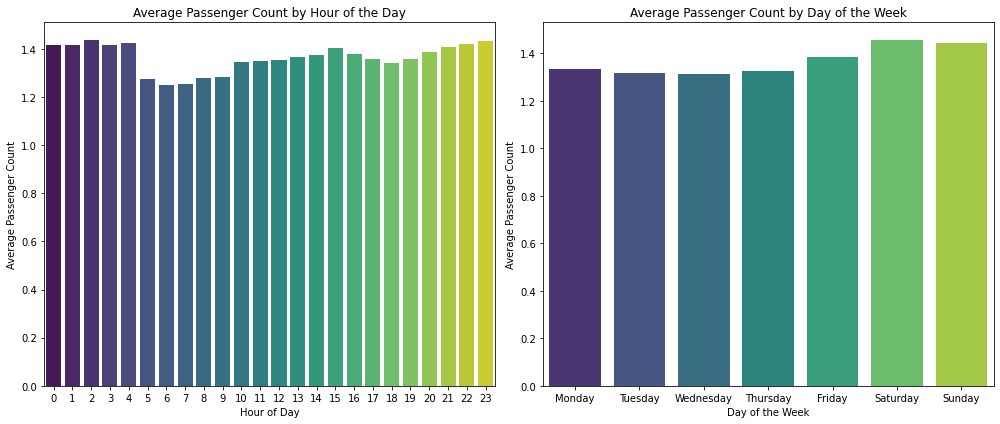

In [0]:
# See how passenger count varies across hours and days

# Convert 'tpep_pickup_datetime' to datetime
non_zero_df['tpep_pickup_datetime'] = pd.to_datetime(non_zero_df['tpep_pickup_datetime'])

# Extract hour and day of the week
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour
non_zero_df['day_of_week'] = non_zero_df['tpep_pickup_datetime'].dt.day_name()  # Get day names

# Group by hour and calculate average passenger count
average_passenger_by_hour = non_zero_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

# Group by day of the week and calculate average passenger count
average_passenger_by_day = non_zero_df.groupby('day_of_week')['passenger_count'].mean().reset_index()

# Sort days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_passenger_by_day['day_of_week'] = pd.Categorical(average_passenger_by_day['day_of_week'], categories=days_order, ordered=True)
average_passenger_by_day = average_passenger_by_day.sort_values('day_of_week')

# Display results
print("Average Passenger Count by Hour:")
print(average_passenger_by_hour)

print("\nAverage Passenger Count by Day of the Week:")
print(average_passenger_by_day)

# Visualization
plt.figure(figsize=(14, 6))

# Bar plot for average passenger count by hour
plt.subplot(1, 2, 1)
sns.barplot(data=average_passenger_by_hour, x='pickup_hour', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')

# Bar plot for average passenger count by day of the week
plt.subplot(1, 2, 2)
sns.barplot(data=average_passenger_by_day, x='day_of_week', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')

plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Passenger Count by Zone:
 PULocationID total_passenger_count average_passenger_count
0 1 6 1.200000
1 4 325 1.331967
2 7 54 1.227273
3 8 2 2.000000
4 9 1 1.000000
.. ... ... ...
175 261 1457 1.454092
176 262 3966 1.303319
177 263 5821 1.349954
178 264 2367 1.305571
179 265 39 1.500000

[180 rows x 3 columns]

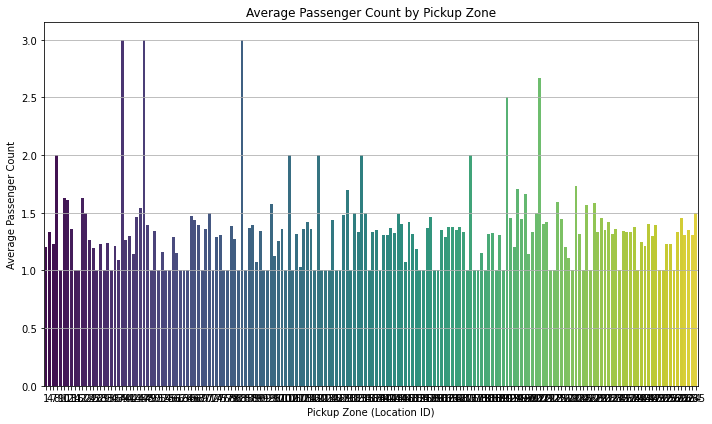

In [0]:
# How does passenger count vary across zones

# Group by pickup location and calculate total and average passenger count
passenger_count_by_zone = non_zero_df.groupby('PULocationID').agg(
    total_passenger_count=('passenger_count', 'sum'),
    trip_count=('passenger_count', 'count')
).reset_index()

# Calculate average passenger count per trip for each zone
passenger_count_by_zone['average_passenger_count'] = passenger_count_by_zone['total_passenger_count'] / passenger_count_by_zone['trip_count']

# Display the results
print("Passenger Count by Zone:")
print(passenger_count_by_zone[['PULocationID', 'total_passenger_count', 'average_passenger_count']])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=passenger_count_by_zone, x='PULocationID', y='average_passenger_count', palette='viridis')
plt.title('Average Passenger Count by Pickup Zone')
plt.xlabel('Pickup Zone (Location ID)')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [0]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Group by LocationID and calculate total passenger count and number of trips
passenger_count_by_zone = merged_trip_zone.groupby('LocationID').agg(
    total_passenger_count=('passenger_count', 'sum'),
    trip_count=('passenger_count', 'count')
).reset_index()

# Calculate average passenger count for each zone
passenger_count_by_zone['average_passenger_count'] = passenger_count_by_zone['total_passenger_count'] / passenger_count_by_zone['trip_count']

# Merge the average passenger count back to the zones GeoDataFrame
zones_with_trips = zones.merge(passenger_count_by_zone[['LocationID', 'average_passenger_count']], on='LocationID', how='left')

# Fill NaN values with 0 for zones with no trips
zones_with_trips['average_passenger_count'] = zones_with_trips['average_passenger_count'].fillna(0)

# Display the updated zones GeoDataFrame
print("Zones GeoDataFrame with Average Passenger Count:")
print(zones_with_trips[['LocationID', 'borough', 'average_passenger_count']])

Zones GeoDataFrame with Average Passenger Count:
 LocationID borough average_passenger_count
0 1 EWR 1.200000
1 2 Queens 0.000000
2 3 Bronx 0.000000
3 4 Manhattan 1.326531
4 5 Staten Island 0.000000
.. ... ... ...
258 259 Bronx 0.000000
259 260 Queens 1.333333
260 261 Manhattan 1.435468
261 262 Manhattan 1.277295
262 263 Manhattan 1.328692

[263 rows x 3 columns]

In [0]:
zones_with_trips.head()

Out[83]:

OBJECTID 
 Shape_Leng 
 Shape_Area 
 zone 
 LocationID 
 borough 
 geometry 
 average_passenger_count 
 
 
 
 
 0 
 1 
 0.116357 
 0.000782 
 Newark Airport 
 1 
 EWR 
 POLYGON ((933100.918 192536.086, 933091.011 19... 
 1.200000 
 
 
 1 
 2 
 0.433470 
 0.004866 
 Jamaica Bay 
 2 
 Queens 
 MULTIPOLYGON (((1033269.244 172126.008, 103343... 
 0.000000 
 
 
 2 
 3 
 0.084341 
 0.000314 
 Allerton/Pelham Gardens 
 3 
 Bronx 
 POLYGON ((1026308.770 256767.698, 1026495.593 ... 
 0.000000 
 
 
 3 
 4 
 0.043567 
 0.000112 
 Alphabet City 
 4 
 Manhattan 
 POLYGON ((992073.467 203714.076, 992068.667 20... 
 1.326531 
 
 
 4 
 5 
 0.092146 
 0.000498 
 Arden Heights 
 5 
 Staten Island 
 POLYGON ((935843.310 144283.336, 936046.565 14... 
 0.000000

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [0]:
# Check how often surcharges are applied
surcharge_applied = non_zero_df['extra'] > 0
surcharge_count = surcharge_applied.sum()
total_trips = len(non_zero_df)

# Calculate the prevalence of surcharges
surcharge_prevalence = (surcharge_count / total_trips) * 100

print(f"Total number of trips: {total_trips}")
print(f"Number of trips with surcharges: {surcharge_count}")
print(f"Prevalence of surcharges: {surcharge_prevalence:.2f}%")

# Analyze by Pickup Zones
pickup_surcharge_analysis = non_zero_df[surcharge_applied].groupby('PULocationID').size().reset_index(name='surcharge_count')

# Analyze by Dropoff Zones
dropoff_surcharge_analysis = non_zero_df[surcharge_applied].groupby('DOLocationID').size().reset_index(name='surcharge_count')

# Analyze by Pickup Hour
non_zero_df['pickup_hour'] = non_zero_df['tpep_pickup_datetime'].dt.hour
hourly_surcharge_analysis = non_zero_df[surcharge_applied].groupby('pickup_hour').size().reset_index(name='surcharge_count')

# Display analyses
print("\nSurcharge Counts by Pickup Zone:")
print(pickup_surcharge_analysis)

print("\nSurcharge Counts by Dropoff Zone:")
print(dropoff_surcharge_analysis)

print("\nSurcharge Counts by Hour of Pickup:")
print(hourly_surcharge_analysis)

Total number of trips: 214738
Number of trips with surcharges: 132341
Prevalence of surcharges: 61.63%

Surcharge Counts by Pickup Zone:
 PULocationID surcharge_count
0 1 1
1 4 171
2 7 17
3 10 17
4 12 28
.. ... ...
128 261 591
129 262 1338
130 263 2477
131 264 1039
132 265 2

[133 rows x 2 columns]

Surcharge Counts by Dropoff Zone:
 DOLocationID surcharge_count
0 1 150
1 3 8
2 4 598
3 5 1
4 6 1
.. ... ...
245 261 575
246 262 2393
247 263 3194
248 264 1182
249 265 306

[250 rows x 2 columns]

Surcharge Counts by Hour of Pickup:
 pickup_hour surcharge_count
0 0 5741
1 1 3843
2 2 2528
3 3 1559
4 4 858
5 5 835
6 6 914
7 7 1698
8 8 2300
9 9 2757
10 10 2949
11 11 3030
12 12 3281
13 13 3419
14 14 3768
15 15 3793
16 16 9902
17 17 11575
18 18 12554
19 19 11217
20 20 11937
21 21 12163
22 22 11165
23 23 8555

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies


we can follow below mentioned option to improve the situation in the future:

1.we need to dentify slow routes and adjust dispatching strategies to minimize inefficiencies.

2.For instance, if certain routes consistently show low speeds during specific hours like location id 1 and 4 is having slow speed so we can consider alternative routes or provide additional training to drivers on those routes.

3.we can also establish a feedback mechanism for drivers and customers to report issues related to routing, wait times, and overall service quality. Use this feedback to continuously improve operations.

4.Implement surge pricing or incentives for drivers to work during peak hours to balance supply and demand. This can help reduce wait times for customers during busy periods.

5.For nighttime hours (11 PM to 5 AM), we can ensure that there are enough drivers available, especially in areas with high demand during these hours.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1.Allocate more cabs to high-demand zones identified during peak hours (e.g., rush hours) and weekends. sp more cabs in weekdays as seen in trip data.

2.Reduce the number of cabs in consistently low-demand areas to minimize operational costs. Consider offering incentives for drivers to operate in these zones during off-peak times.

3.Increase the number of cabs in zones with high demand during nighttime hours (11 PM to 5 AM). Use data to identify hotspots for late-night pickups, such as entertainment districts or areas with late-night events.

4.During weekdays, focus on business districts where demand is likely to be higher during working hours. Position cabs in areas near offices, conference centers, and transportation hubs.

5.Position more cabs in areas known for nightlife, restaurants, and entertainment venues during weekends. These zones typically see increased demand for rides during evenings.

6.Ensure that cabs are available in residential areas or near family attractions during the day on weekends, as families may be more likely to travel for outings.

7.Implement surge pricing during peak demand times to encourage more drivers to position themselves in high-demand zones.
Bonuses for Low-Demand Areas: Offer bonuses or incentives for drivers who accept rides in low-demand areas to ensure coverage 

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1.Implement a dynamic pricing model based on real-time demand and supply conditions, adjusting fares during peak times and special events.

2.Introduce surge pricing during identified peak hours and high-demand zones to capitalize on increased willingness to pay.

3.Adjust pricing tiers based on trip distance, offering competitive rates for short trips while maintaining higher rates for longer distances.

4.Differentiate prices based on the time of day, with lower rates during off-peak hours to encourage usage and higher rates during peak hours.

5.Introduce surcharges for additional services (e.g., extra luggage, special requests) to boost revenue without alienating customers.

6.Offer promotional discounts during low-demand periods to attract more customers and increase trip volume.

7.Implement loyalty programs that reward frequent riders with discounts or credits, encouraging repeat business while maintaining price competitiveness.

8.Clearly communicate pricing structures, surcharges, and potential discounts to build trust and encourage customer engagement.

9.Regularly monitor competitor pricing strategies and adjust fares accordingly to remain competitive in the market.

10.Continuously analyze trip data to identify patterns, customer preferences, and price sensitivity, refining pricing models based on findings.